# Introduction

## Background

### Cited Sources

  - **[TD3]:** Lillicrap, T. P., Hunt, J. J., Pritzel, A., Heess, N., Erez, T., Tassa, Y., ... & Wierstra, D. (2015). Continuous control with deep reinforcement learning. arXiv preprint arXiv:1509.02971. [link](https://arxiv.org/abs/1509.02971)
  - **[SAC]:** Haarnoja, T., Zhou, A., Abbeel, P., & Levine, S. (2018, July). Soft actor-critic: Off-policy maximum entropy deep reinforcement learning with a stochastic actor. In International conference on machine learning (pp. 1861-1870). PMLR. [link](https://arxiv.org/abs/1801.01290)
  - **[SAC]** Haarnoja, T., Zhou, A., Hartikainen, K., Tucker, G., Ha, S., Tan, J., ... & Levine, S. (2018). Soft actor-critic algorithms and applications. arXiv preprint arXiv:1812.05905. [link](https://arxiv.org/pdf/1812.05905.pdf))
   - **[Spectral Normalization]:** Miyato, T., Kataoka, T., Koyama, M., & Yoshida, Y. (2018). Spectral normalization for generative adversarial networks. arXiv preprint arXiv:1802.05957. [link](https://arxiv.org/abs/1802.05957v1)
- **[Problem Form]:** Kolosa, D. S. (2019). A Reinforcement Learning Approach to Spacecraft Trajectory Optimization. Western Michigan University. [link](https://search.proquest.com/openview/320685ea5feac29eb871b0c9f169d002/1?pq-origsite=gscholar&cbl=18750&diss=y)
 - **[Liquid NNs]:** Hasani, R., Lechner, M., Amini, A., Rus, D., & Grosu, R. (2021, May). Liquid time-constant networks. In Proceedings of the AAAI Conference on Artificial Intelligence (Vol. 35, No. 9, pp. 7657-7666). [link](https://ojs.aaai.org/index.php/AAAI/article/view/16936)
 - **[Hyperbolic Deep RL]:** Cetin, Edoardo, et al. "Hyperbolic Deep Reinforcement Learning." arXiv preprint arXiv:2210.01542 (2022). [link](https://arxiv.org/abs/2210.01542)

### Problem Statement

In the two body dominated regime, the problem of spacecraft impulsive trajectory optimization is largely solved. However, introducing third body dynamics and beyond necessitates often time consuming numerical methods in conjunction with higher level decision making in order to arrive at solutions for transfer maneuvers. The purpose of this notebook is to explore and experiment with reinforcement learning algorithms that might first solve trajectory optimization in the two body regime (as a proof of concept), and subsequently solve optimization in higher body problem formulations.

This is technically defined as a multi-objective off policy model-free optimization problem with continuous state and action spaces.

Currently, algorithms under investigation include:
 - TD3
 - SAC
 - Liquid NNs

### Decisions and Rationale

 -  Poliastro was selected as the trajectory computation backend due to its pedigree and open source nature
 - TD3 was tested but resulted in saturation of actions despite hyperparameter and architecture variation. This is likely due to the poor performance of TD3 on complex environments with multiple reward sources to optimize for. TD3 was deemed to be a dead end

### General Knowledge

 - [General Rules of Thumb](https://jonathan-hui.medium.com/rl-tips-on-reinforcement-learning-fbd121111775) 
 - [A survey of current RL algorithms](https://jonathan-hui.medium.com/rl-reinforcement-learning-algorithms-overview-96a1500ffcda)
 - [Explanation of SAC](https://towardsdatascience.com/soft-actor-critic-demystified-b8427df61665)

## Notes/Lessons Learned

 
 - evolutionary neurocontrol: terminology denoting a combination of evolutionary and machine learning techniques. 

 - CU Aerospace (NASA Contractor) has created a tool called Dynamically Leveraged Automated (N) Multibody Trajectory Optimisation

    - DyLAN enables automated multiple objective global trajectory optimisation for both low-thrust and impulsive thrust in  multiple gravitational body environments
    
    - supports accurate preliminary mission design
    
    - a seamless blending of dynamical systems concepts with state-of-the-art global optimisation techniques
    
    - DyLAN uses a hybrid optimisation architecture, whereby the optimisation problem is split into two levels
    
    - This first level is solved with a genetic algorithm (GA) that evolves over many iterations to find the best global structure for the trajectory optimisation problem.
    
    - The second level is solved using a direct optimisation approach, where a multiple shooting control transcription converts the optimal control problem into a nonlinear program

- Deep Q Networks in general do not work with continuous action/state spaces because they work by building a table of discrete state/action pairs. There are ways around this, but for now this is not a first choice
 
- In cases with large feature inputs, it is desirable (or even necessary) to scale the inputs before input to the neural network. Failing this, one can impliment layer normalization to curb exploading gradients at the beginning of the network.
    - a symptom of this failure will be the agent taking extreme (max/min) actions without change in behaviour over many training episodes
- Investigation into layer activation functions and their effects on the gradient is merited when performance does not seem to be improving or is exhibiting behaviour counter to expectations
    - Specifically look into phyiscs informed/based neural networks
- Any state reachable by the agent will be reached. To disincentivize this, negative rewards must be put in place for arriving at these states
- rewards for matching or getting close to the target must be supplemented by rewards for reaching the magnitude of the position and velocity of the target. This is because the agent will sometimes have no good option for taking an action with a positive reward if judgement is passed not only on the exactness of the match, but on the match to magnitude or position and velocity vectors.

## To Do


 - code check on actions generated 
 - add state information corresponding to target position and velocity difference from current position and velocity.
 - update reward function to feature difference in difference between target and current location. That is, how much progress was made towards the target by each maneuver
 - square the distance reward to exponentially reward getting closer
 - introduce decaying noise via equation 5.14
 
 
 - Change actor and critic networks X
 - Change inputs from velocity to orb elements (a,ex,ey,hx,hy) X
 - Ensure decaying action noise X
 - change model to low thrust X
 - change model to low time increments X
 - change reward function to be based on orbital elements X
 - change plotting to multi-trajectory from multi-orbit X
 - ensure thrust directions align with sc pointing direction X
 - change initial and target states
 - impliment prioritized experience replay X
 - fix runner/agent interaction X
 - Reconfigure Actor/Critic Networks X
 - Impliment OU noise X
 - Fix noise decay X
 - ensure functionality of layer normalization X
 - ensure functionality of neural net X
 - ensure functionality of replay buffer X
 - Try scaling the reward
 - Ensure appropriate reward (agent encouraged to leave home orbit)
 - either rationalize the state vector as is, or add information about current location perhaps via argument to perigee + true anomaly X
 - Penalize the use of delta V X
 - Reduce the exploration area (out of bounds sooner)
 - code and validate SAC algorithm
 - code spectral normaliation module
 - impliment hyperbolic deep neural networks

In [ ]:
#This is a test addition

# Initialization and Performance Baselines

In [ ]:
!which jupyter-nbrequirements

## Imports

In [1]:
import sys
import os
import random
import math

import numpy as np 
from numpy import cos, sin
import matplotlib
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

import pickle as pkl
import PIL.Image as Image



from PIL import Image
import copy
import seaborn as sns


import gym
from gym import Env, spaces
import time
import operator



from datetime import datetime
import navpy as nav


from poliastro.bodies import Sun, Earth, Moon
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.plotting.misc import plot_solar_system
from poliastro.twobody import Orbit
from poliastro.util import norm, time_range
from poliastro.constants import J2000
from poliastro.plotting import OrbitPlotter3D
from poliastro.plotting import OrbitPlotter2D
from poliastro.twobody.sampling import EpochsArray, TrueAnomalyBounds, EpochBounds
from poliastro.maneuver import Maneuver
from poliastro.twobody.propagation import propagate, cowell
from poliastro import constants



from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris
from astropy.utils.data import conf

conf.dataurl
conf.remote_timeout = 10000
solar_system_ephemeris.set("jpl")

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from torch.autograd import Variable
from torch.distributions import Normal








In [2]:
import operator
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import LambdaLR

## Hohman Baseline

In [ ]:
op = OrbitPlotter2D()

orb_i = Orbit.circular(Earth, alt=700 << u.km)
sat_rs = orb_i.sample(1000)
hoh = Maneuver.hohmann(orb_i, 35786  << u.km)

orb_a, orb_f = orb_i.apply_maneuver(hoh, intermediate=True)
op.plot(orb_i, label="Initial orbit")
op.plot(orb_a, label="Transfer orbit")
op.plot(orb_f, label="Final orbit")
op.show()

In [ ]:
tot_dV = hoh.get_total_cost()
tot_dt = hoh.get_total_time() << u.day
print(tot_dV)
print(tot_dt)

## CR3BP Baseline

# RL Modules

## Memory

### Prioritized Replay Buffer

In [3]:
class PrioritizedReplayBuffer:
    def __init__(self, state_size, action_size, buffer_size, eps=1e-2, alpha=0.2, beta=0.4):
        self.tree = SumTree(size=buffer_size)

        # PER params
        self.eps = eps  # minimal priority, prevents zero probabilities
        self.alpha = alpha  # determines how much prioritization is used, α = 0 corresponding to the uniform case
        self.beta = beta  # determines the amount of importance-sampling correction, b = 1 fully compensate for the non-uniform probabilities
        self.max_priority = eps  # priority for new samples, init as eps

        # transition: state, action, reward, next_state, done
        self.state = torch.empty(buffer_size, state_size, dtype=torch.float)
        self.action = torch.empty(buffer_size, action_size, dtype=torch.float)
        self.reward = torch.empty(buffer_size, dtype=torch.float)
        self.next_state = torch.empty(buffer_size, state_size, dtype=torch.float)
        self.done = torch.empty(buffer_size, dtype=torch.int)

        self.count = 0
        self.real_size = 0
        self.size = buffer_size

    def add(self, transition):
        state, action, reward, next_state, done = transition
        # store transition index with maximum priority in sum tree
        self.tree.add(self.max_priority, self.count)
        # store transition in the buffer
        self.state[self.count] = torch.as_tensor(state)
        self.action[self.count] = torch.as_tensor(action)
        self.reward[self.count] = torch.as_tensor(reward)
        self.next_state[self.count] = torch.as_tensor(next_state)
        self.done[self.count] = torch.as_tensor(done)

        # update counters
        self.count = (self.count + 1) % self.size
        self.real_size = min(self.size, self.real_size + 1)

    def sample(self, batch_size):
        assert self.real_size >= batch_size, "buffer contains less samples than batch size"

        sample_idxs, tree_idxs = [], []
        priorities = torch.empty(batch_size, 1, dtype=torch.float)

        # To sample a minibatch of size k, the range [0, p_total] is divided equally into k ranges.
        # Next, a value is uniformly sampled from each range. Finally the transitions that correspond
        # to each of these sampled values are retrieved from the tree. (Appendix B.2.1, Proportional prioritization)

        segment = self.tree.total / batch_size
        for i in range(batch_size):
            a, b = segment * i, segment * (i + 1)

            cumsum = random.uniform(a, b)
            # sample_idx is a sample index in buffer, needed further to sample actual transitions
            # tree_idx is a index of a sample in the tree, needed further to update priorities
            tree_idx, priority, sample_idx = self.tree.get(cumsum)

            priorities[i] = priority
            tree_idxs.append(tree_idx)
            sample_idxs.append(sample_idx)

        # Concretely, we define the probability of sampling transition i as P(i) = p_i^α / \sum_{k} p_k^α
        # where p_i > 0 is the priority of transition i. (Section 3.3)
        probs = priorities / self.tree.total

        # The estimation of the expected value with stochastic updates relies on those updates corresponding
        # to the same distribution as its expectation. Prioritized replay introduces bias because it changes this
        # distribution in an uncontrolled fashion, and therefore changes the solution that the estimates will
        # converge to (even if the policy and state distribution are fixed). We can correct this bias by using
        # importance-sampling (IS) weights w_i = (1/N * 1/P(i))^β that fully compensates for the non-uniform
        # probabilities P(i) if β = 1. These weights can be folded into the Q-learning update by using w_i * δ_i
        # instead of δ_i (this is thus weighted IS, not ordinary IS, see e.g. Mahmood et al., 2014).
        # For stability reasons, we always normalize weights by 1/maxi wi so that they only scale the
        # update downwards (Section 3.4, first paragraph)
        weights = (self.real_size * probs) ** -self.beta

        # As mentioned in Section 3.4, whenever importance sampling is used, all weights w_i were scaled
        # so that max_i w_i = 1. We found that this worked better in practice as it kept all weights
        # within a reasonable range, avoiding the possibility of extremely large updates. (Appendix B.2.1, Proportional prioritization)
        weights = weights / weights.max()

        batch = (
            self.state[sample_idxs].to(gt_device()),
            self.action[sample_idxs].to(gt_device()),
            self.reward[sample_idxs].to(gt_device()),
            self.next_state[sample_idxs].to(gt_device()),
            self.done[sample_idxs].to(gt_device())
        )
        return batch, weights, tree_idxs
    
    def get_all(self):
        
        all_idxs = np.linspace(1,self.size-1, self.size-1)
        
        batch = (
            self.state[all_idxs].to(gt_device()),
            self.action[all_idxs].to(gt_device()),
            self.reward[all_idxs].to(gt_device()),
            self.next_state[all_idxs].to(gt_device()),
            self.done[all_idxs].to(gt_device())
        )

        return self.state[all_idxs].to(gt_device())
    
    def update_priorities(self, data_idxs, priorities):
        if isinstance(priorities, torch.Tensor):
            priorities = priorities.clone().detach().cpu().numpy()
            
        priorities = priorities[0]
        for data_idx, priority in zip(data_idxs, priorities):

            # The first variant we consider is the direct, proportional prioritization where p_i = |δ_i| + eps,
            # where eps is a small positive constant that prevents the edge-case of transitions not being
            # revisited once their error is zero. (Section 3.3)

            check = priority + self.eps

            priority = (priority + self.eps) ** self.alpha

            self.tree.update(data_idx, priority)
            self.max_priority = max(self.max_priority, priority)
    
    
    def populate_buffer(self, env, total_samples):
        """run episodes while taking random actions and filling replay_buffer

            Args:
                env (env): gym environment
                replay_buffer(ReplayBuffer): buffer to store experience replay
                observation_steps (int): how many steps to observe for

        """
    
        sample_num = 0
        obs,_ = env.reset()
        done = False


        
        while sample_num < total_samples/4:
            
            obs,_ = env.reset()
            

            action = env.action_space.sample()
            new_obs, reward, term, trunc, _ = env.step(action)
            done = trunc or term

            self.add((obs, action, reward, new_obs, done))

            obs = new_obs
            sample_num += 1

            print("\rPopulating Buffer {}/{}.".format(sample_num, total_samples), end="")
            sys.stdout.flush()
                
        while sample_num < total_samples*(3/4):
            
            obs, _ = env.randomize()
            action = env.action_space.sample()
            new_obs, reward, term, trunc, _ = env.step(action)
            done = trunc or term

            self.add((obs, action, reward, new_obs, done))


            sample_num += 1

            
            print("\rPopulating Buffer {}/{}.".format(sample_num, total_samples), end="")
            sys.stdout.flush()

        while sample_num < total_samples:
            
            obs, _ = env.return_target_state()
            action = env.action_space.sample()
            new_obs, reward, term, trunc, _ = env.step(action)
            done = trunc or term

            self.add((obs, action, reward, new_obs, done))


            sample_num += 1

            
            print("\rPopulating Buffer {}/{}.".format(sample_num, total_samples), end="")
            sys.stdout.flush()
            
    
    def save(self, filename):
        with open(filename + '.pkl', 'wb') as f:  # open a text file
            pkl.dump(self, f)
        f.close()
        
    def load(self, filename):
        with open(filename + '.pkl', 'rb') as f:
            loaded_replay_buffer = pkl.load(f)
        return loaded_replay_buffer


### Sum Tree

In [4]:
# The ‘sum-tree’ data structure used here is very similar in spirit to the array representation
# of a binary heap. However, instead of the usual heap property, the value of a parent node is
# the sum of its children. Leaf nodes store the transition priorities and the internal nodes are
# intermediate sums, with the parent node containing the sum over all priorities, p_total. This
# provides a efficient way of calculating the cumulative sum of priorities, allowing O(log N) updates
# and sampling. (Appendix B.2.1, Proportional prioritization)

# Additional useful links
# Good tutorial about SumTree data structure:  https://adventuresinmachinelearning.com/sumtree-introduction-python/
# How to represent full binary tree as array: https://stackoverflow.com/questions/8256222/binary-tree-represented-using-array
class SumTree:
    def __init__(self, size):
        self.nodes = [0] * (2 * size - 1)
        self.data = [None] * size

        self.size = size
        self.count = 0
        self.real_size = 0

    @property
    def total(self):

        return self.nodes[0]

    def update(self, data_idx, value):
        idx = data_idx + self.size - 1  # child index in tree array
        change = value - self.nodes[idx]
        self.nodes[idx] = value

        parent = (idx - 1) // 2
        while parent >= 0:
            self.nodes[parent] += change
            parent = (parent - 1) // 2

    def add(self, value, data):
        self.data[self.count] = data
        self.update(self.count, value)

        self.count = (self.count + 1) % self.size
        self.real_size = min(self.size, self.real_size + 1)

    def get(self, cumsum):

        assert cumsum <= self.total

        idx = 0
        while 2 * idx + 1 < len(self.nodes):
            left, right = 2*idx + 1, 2*idx + 2

            if cumsum <= self.nodes[left]:
                idx = left
            else:
                idx = right
                cumsum = cumsum - self.nodes[left]

        data_idx = idx - self.size + 1

        return data_idx, self.nodes[idx], self.data[data_idx]

    def __repr__(self):
        return f"SumTree(nodes={self.nodes.__repr__()}, data={self.data.__repr__()})"

## Functions

In [5]:
def evaluate_policy(policy, env, eval_episodes=100,render=False):
    """run several episodes using the best agent policy
        
        Args:
            policy (agent): agent to evaluate
            env (env): gym environment
            eval_episodes (int): how many test episodes to run
            render (bool): show training
        
        Returns:
            avg_reward (float): average reward over the number of evaluations
    
    """
    
    avg_reward = 0.
    for i in range(eval_episodes):
        obs,_ = env.reset()
        done = False
        while not done:
            if render:
                env.render()
            action = policy.select_action(np.array(obs), noise=0)
            obs, reward, term, trunc, _ = env.step(action)
            done = trunc or term
            avg_reward = avg_reward + reward

    avg_reward /= eval_episodes

    print("\n---------------------------------------")
    print("Evaluation over {:d} episodes: {:f}" .format(eval_episodes, avg_reward))
    print("---------------------------------------")
    return avg_reward

In [6]:
def gt_device(force_cpu=False):
    return "cuda" if torch.cuda.is_available() and not force_cpu else "cpu"

In [7]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        random.seed(seed)
        np.random.seed(seed)
        self.size = size
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(self.size)
        self.state = x + dx
        return self.state

In [8]:
seed=1

oun = OUNoise(3, seed)
oun.sample()

array([ 0.32486907, -0.12235128, -0.10563435])

In [9]:
def get_normalization_params(states):
    means = []
    stds = []
    for n in range(0, states.shape[1]):
        state_elements_array = states.clone().numpy()[:,n]
        mean = state_elements_array.mean()
        std = state_elements_array.std()
        means.append(mean)
        stds.append(std)
    return means, stds

In [10]:
def get_scale_params(states):
    maxs = []
    mins = []
    for n in range(0, states.shape[1]):
        state_elements_array = states.clone().numpy()[:,n]
        max_val = state_elements_array.max()
        min_val = state_elements_array.min()
        maxs.append(max_val)
        mins.append(min_val)
    return maxs, mins

In [11]:
def normalize_input(data_tensor, means, stds):
    data_array = data_tensor.clone().numpy()
    for n in range(0, data_array.shape[1]):
        normalized_column = (data_array[:, n] - means[n]) / stds[n]
        data_array[:, n] = normalized_column
    return data_array

In [12]:
def scale_input(data_tensor, maxs, mins):
    if not isinstance(data_tensor, np.ndarray):
        data_array = data_tensor.clone().numpy()
    else:
        data_array = data_tensor
    for n in range(0, data_array.shape[1]):
        scaled_column = (data_array[:, n] - mins[n]) / (maxs[n] - mins[n])
        data_array[:, n] = scaled_column
    return data_array

In [13]:
def clear_directory(directory_path):
    # Get all the file names in the directory
    file_names = os.listdir(directory_path)

    # Iterate through the file names and remove each file
    for file_name in file_names:
        file_path = os.path.join(directory_path, file_name)
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Removed {file_path}")

    print(f"Directory {directory_path} cleared.")


In [14]:
def expected_improvement_in_policy(replay_buffer, policy, value_function):
    priorities = np.zeros(len(replay_buffer))
    for i, experience in enumerate(replay_buffer):
        state, action, reward, next_state, done = experience
        advantage = reward + (1 - done) * value_function(next_state) - value_function(state)
        abs_advantage = abs(advantage)
        priorities[i] = abs_advantage
    return priorities


In [15]:
def expected_reduction_in_bellman_residual(replay_buffer, q_function):
    priorities = np.zeros(len(replay_buffer))
    for i, experience in enumerate(replay_buffer):
        state, action, reward, next_state, done = experience
        target_q = reward + (1 - done) * np.max(q_function(next_state))
        bellman_residual = abs(target_q - q_function(state)[action])
        priorities[i] = bellman_residual
    return priorities

In [16]:
def moving_average(values, window):
    """
    Computes the moving average of a list of values with a given window size.
    
    Parameters:
    values (list): A list of numerical values to be smoothed.
    window (int): The size of the averaging window.
    
    Returns:
    list: A new list of smoothed values.
    """
    # Create a new list to store the smoothed values
    smoothed_values = []
    
    # Iterate over each value in the original list
    for i in range(len(values)):
        # Compute the average of the values within the window
        if i < window:
            smoothed_value = sum(values[:i+1]) / (i+1)
        else:
            smoothed_value = sum(values[i-window+1:i+1]) / window
        
        # Add the smoothed value to the new list
        smoothed_values.append(smoothed_value)
    
    return smoothed_values

In [17]:
#         actor_state_dict  = self.actor.state_dict()
# #         for key in actor_state_dict.keys():
# #             print(key)
#         actor_weight_dict = {k: v for k, v in actor_state_dict.items() if 'weight' in k and not 'layer' in k}.copy()
#         actor_weight_array = np.array([actor_weight_dict[key].numpy() for key in actor_weight_dict])

#         initial_weights = actor_weight_array.copy()
#         print(initial_weights)
#         print(hex(id(initial_weights)))
#         print(actor_weight_array[0].shape)
#         for l in range(0,len(actor_weight_array)):

#             # create heatmap using seaborn
#             sns.heatmap(actor_weight_array[l], vmin=vmin, vmax=vmax, cmap='coolwarm')
#             output_dir = "Network Visualization"
#             output_file = "actor_network_weights_layer_" + str(l) + ".png"
#             output_path = os.path.join(output_dir, output_file)
#             plt.savefig(output_path)
#             plt.close()

# Algorithms

# Custom Gym Environments

## Spacecraft Module

In [22]:
class SC(object):
    def __init__(self, orb, targ_orb):
        
        self.max_dV = .6 
        
        
        self.mass = 2000 << u.kg
        self.Isp = 300 << u.s
        self.prop_mass = 1500 << u.kg
        
        
        self.orb = orb
        self.targ_orb = targ_orb
        
        self.r = self.orb.r
        self.v = self.orb.v
        self.a = self.orb.a
        self.e_v = self.orb.e_vec
        self.h_v = self.orb.h_vec
        self.rp = self.orb.r_p
        self.ra = self.orb.r_a
        self.nu = self.orb.nu
        self.T = self.orb.period
        self.E = self.orb.energy
        
        self.ephems = self.orb.to_ephem(strategy=TrueAnomalyBounds(min_nu=None, max_nu=None, num_values=1000, hyp_r_factor=3.0))
    
        self.sat_rvs = self.ephems.rv()
        
        self.sat_rmags = np.linalg.norm(self.sat_rvs[0].value, axis=1) << u.km
        self.sat_rs = self.sat_rvs[0].value << u.km
        self.sat_vs = self.sat_rvs[1].value << (u.km / u.s)
        self.targ_r = targ_orb.r
        self.targ_v = targ_orb.v
        
        
        a = self.a.value
        e_v = self.e_v.value
        h_v = self.h_v.value
        theta = self.nu.value
        inc = self.orb.inc.value
        
        state = np.array([a, e_v[0], e_v[1], h_v[0], h_v[1], theta, inc])
        
       
        
    def move(self, dV, dt):


        #Get orbital elements for Euler angle computation
        raan = self.orb.raan
        inc = self.orb.inc
        argp = self.orb.argp
        nu = self.orb.nu
        rs = self.orb.r
        vs = self.orb.v
        rp = self.orb.r_p.value
        r_mag = np.linalg.norm(rs)
        gme = constants.GM_earth
        ecc = self.orb.ecc.value
        
        #calculate the angular momentum of the orbit
        h_mag = np.linalg.norm(np.cross(rs,vs))

        #calculate the radial component of the sc velocity
        v_rad = (gme/h_mag)*ecc*sin(nu)
        v_rad = v_rad.to(u.km/u.s)
        
        #calculate the component of the velocity perpendicular to the radial velocity in the orbit plane
        v_perp = h_mag/r_mag

        #calculate the flight path angle, or the angle from the perpendicular to the sc pointing direction
        fpa = np.arctan(v_rad.value/v_perp.value) << u.rad
        
        #Define the rotational angles for the direction cosine matrices
        #The first rotation is about the z axis using the right ascension of the ascending node, aligning the x axis
        #with the node line
        thet= raan
        #The second rotation is about the x axis using the inclination, putting the x and y axis on the orbital plane
        phi = inc
        #Specifically, the last rotation (about the z axis) rotates the frame to the perifocal frame at the sc
        #location (y axis along the perpendicular, x axis along the radial) using the argument of true latitude (argp +nu),
        #then alines the y axis (pointing along the perpendicular) to the sc pointing direction using the flight path angle
        psi = argp +nu - fpa
              
        dV_LVLH = dV

        #The classical Euler rotation sequence (3-1-3) is accomplished via matrix multiplication
        #of the associated cosine matrices. R1 represents a rotation about the x axis, R2 (not used) rotates about the y axis
        #and R3 rotates about the z axis
        R3a = [[cos(psi), sin(psi), 0],
              [-sin(psi), cos(psi), 0],
              [0, 0, 1]]
        
        R1 = [[1, 0, 0],
              [0, cos(phi), sin(phi)],
              [0, -sin(phi), cos(phi)]]
        
#         R2 = [[cos(thet), 0, -sin(thet)],
#               [0, 1, 0],
#               [sin(thet), 0, cos(thet)]]

        R3b = [[cos(thet), sin(thet), 0],
              [-sin(thet), cos(thet), 0],
              [0, 0, 1]]
        

        #Multiply the cosine matrices together, resulting in ECI to LVLH frame rotation
        dcm = np.matmul(R3a,np.matmul(R1,R3b))
        
        #Transpose in order to go from LVLH to ECI
        dcm = dcm.T
        
        #Transform the delta V in the LVLH (satellite) frame to the ECI (earth centered) frame
        dV = np.matmul(dcm, dV_LVLH.T)
        

        #Define impulsive burn
        imp = Maneuver.impulse(dV)

        #Perform impulsive burn
        self.orb = self.orb.apply_maneuver(imp)

         #march orbit forward specified dt
        self.orb = self.orb.propagate(dt)


        self.ephems = self.orb.to_ephem(strategy=TrueAnomalyBounds(min_nu=None, max_nu=None, num_values=1000, hyp_r_factor=3.0))
    
        self.sat_rvs = self.ephems.rv()
        
        
        self.sat_rmags = np.linalg.norm(self.sat_rvs[0].value, axis=1) << u.km
        self.sat_rs = self.sat_rvs[0].value << u.km
        self.sat_vs = self.sat_rvs[1].value << (u.km / u.s)
        
        self.r = self.orb.r
        self.v = self.orb.v
        self.a = self.orb.a
        self.e_v = self.orb.e_vec
        self.h_v = self.orb.h_vec
        self.targ_r = self.targ_orb.r
        self.targ_v = self.targ_orb.v
        
        self.rp = self.orb.r_p
        self.ra = self.orb.r_a
        self.nu = self.orb.nu
        self.T = self.orb.period
        self.E = self.orb.energy
        
        r = self.r.value
        v = self.v.value
        a = self.a.value
        e_v = self.e_v.value
        h_v = self.h_v.value
        targ_r = self.targ_r.value
        targ_v = self.targ_v.value
        
        rp = self.rp.value
        ra = self.ra.value
        theta = self.nu.value
        T = self.T.value
        E = self.E.value
        inc = self.orb.inc.value
        state = np.array([a, e_v[0], e_v[1], h_v[0], h_v[1], theta, inc])
        
        self.state = state
        
        return state
        


## Earth-Moon Environment

In [23]:
class EarthMoonSystem(Env):
    def __init__(self):
        super(EarthMoonSystem, self).__init__()
        
        #create a plot handle object to pass to the render function
        self.op = OrbitPlotter3D()
        #Create time object for epoch specification
        i_epoch = Time(datetime(2000, 1, 2, 12, 0, 0), format='datetime', scale='local')
        self.i_epoch = i_epoch
        #create initial circular LEO orbit
        sat_orb = Orbit.circular(Earth, alt=300 << u.km, epoch=i_epoch)
        #Set up target orbit values
        targ_orb = Orbit.circular(Earth, alt=35786 << u.km, epoch=i_epoch)
        
        #Instantiate spacecraft object instance
        self.sc = SC(sat_orb, targ_orb)
        
        #Define simulation time step
        self.dt = 500 << u.s
        
        #Initialize epoch 
        self.old_epoch = sat_orb.epoch
        
        self.total_dt = 0
        self.total_dV = 0
        self.num_man = 0
        
        self.op.plot(targ_orb)
        
        # Define an observation space (the parameters that will be used to represent state to actor)
        self.observation_shape = (7)
        # Define the ranges that the observation values can take
        self.observation_space = spaces.Box(low = np.array([0, 0, 0, 0, 0,0, 0 ]), 
                                            high = np.array([np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]),
                                            dtype = np.float32)
        
        # Define an action space with continuous variables representing thrust angles and magnitude as well as time delay
        # from previous state to next impulse
        dV_max = self.sc.max_dV
        self.n_actions = (3)
        self.action_space = spaces.Box(low = np.array([-dV_max, -dV_max, -dV_max]), 
                                            high = np.array([dV_max, dV_max, dV_max]),
                                            dtype = np.float32)
                        
        
    def reset(self):
        
        self.total_dt = 0
        self.total_dV = 0
        self.num_man = 0
        
        #Instantiate plotter figure and assign handle
        self.op = OrbitPlotter3D()
        #create initial circular LEO orbit
        sat_orb = Orbit.circular(Earth, alt=300 << u.km,epoch=self.i_epoch)
        #Set up target orbit values
        targ_orb = Orbit.circular(Earth, alt=35786 << u.km, epoch=self.i_epoch)
        #create spacecraft object
        self.sc = SC(sat_orb, targ_orb)

        
        self.old_epoch = sat_orb.epoch
        
        self.op.plot(targ_orb)
        
        
        #plot initial orbit
        self.op.plot(sat_orb)
        

        a = self.sc.orb.a.value/1000
        e_v = self.sc.orb.e_vec.value
        h_v = self.sc.orb.h_vec.value
        theta = self.sc.orb.nu.value
        inc = self.sc.orb.inc.value

        state = np.array([a, e_v[0], e_v[1], h_v[0], h_v[1], theta, inc])
        
        return state, self.op
    def randomize(self):    
        self.total_dt = 0
        self.total_dV = 0
        self.num_man = 0
        
        #Instantiate plotter figure and assign handle
        self.op = OrbitPlotter3D()
        r_earth = 6378
        #randomly generate orbital parameters
        a = random.uniform(r_earth+ 300, r_earth + 35786)*u.km
        ecc = random.uniform(0,1)*u.one
        inc = random.uniform(0, 180)*u.deg
        raan = random.uniform(0, 360)*u.deg
        argp = random.uniform(0, 360)*u.deg
        nu = random.uniform(0, 360)*u.deg
        #create initial circular LEO orbit
        sat_orb = Orbit.from_classical(Earth, a, ecc, inc, raan, argp, nu)
        #Set up target orbit values
        targ_orb = Orbit.circular(Earth, alt=35786 << u.km, epoch=self.i_epoch)
        #create spacecraft object
        self.sc = SC(sat_orb, targ_orb)

        
        self.old_epoch = sat_orb.epoch
        
        self.op.plot(targ_orb)
        
        
        #plot initial orbit
        self.op.plot(sat_orb)
        

        a = self.sc.orb.a.value
        e_v = self.sc.orb.e_vec.value
        h_v = self.sc.orb.h_vec.value
        theta = self.sc.orb.nu.value
        inc = self.sc.orb.inc.value

        state = np.array([a, e_v[0], e_v[1], h_v[0], h_v[1], theta, inc])
        return state, self.op
    def return_target_state(self):
        self.total_dt = 0
        self.total_dV = 0
        self.num_man = 0
        
        #Instantiate plotter figure and assign handle
        self.op = OrbitPlotter3D()
        r_earth = 6378
        #randomly generate orbital parameters
        a = random.uniform(r_earth+ 300, r_earth + 35786)*u.km
        ecc = random.uniform(0,1)*u.one
        inc = random.uniform(0, 180)*u.deg
        raan = random.uniform(0, 360)*u.deg
        argp = random.uniform(0, 360)*u.deg
        nu = random.uniform(0, 360)*u.deg
        #create initial circular LEO orbit
        sat_orb = Orbit.circular(Earth, alt=35786 << u.km, epoch=self.i_epoch)
        #Set up target orbit values
        targ_orb = Orbit.circular(Earth, alt=35786 << u.km, epoch=self.i_epoch)
        #create spacecraft object
        self.sc = SC(sat_orb, targ_orb)

        
        self.old_epoch = sat_orb.epoch
        
        self.op.plot(targ_orb)
        
        
        #plot initial orbit
        self.op.plot(sat_orb)
        

        a = self.sc.orb.a.value/1000
        e_v = self.sc.orb.e_vec.value
        h_v = self.sc.orb.h_vec.value
        theta = self.sc.orb.nu.value
        inc = self.sc.orb.inc.value

        state = np.array([a, e_v[0], e_v[1], h_v[0], h_v[1], theta, inc])
        return state, self.op
    
    def step(self, action):

        #Check at each step whether "done", is triggered
        term = False
        trunc = False

        dt = self.dt
        
        #Create impulse vector
        dVx = action[0]
        dVy = action[1]
        dVz = action[2]
        dV = [dVx, dVy, dVz]  << (u.km / u.s)
        
        #Apply impulsive maneuver, obtain resulting state vector
        state = self.sc.move(dV, dt)
        
        #Extract state information
        a = state[0]
        e_v = [state[1],state[2]]
        h_v = [state[3],state[4]]
        theta = state[5]
        inc = state[6]

            
        #Extract target state information
        targ_a = self.sc.targ_orb.a.value/1000
        targ_e_v = self.sc.targ_orb.e_vec.value
        targ_h_v = self.sc.targ_orb.h_vec.value
        targ_inc = self.sc.targ_orb.inc.value



        #Track the number of maneuvers and elapsed time in an episode
        self.num_man += 1
        self.total_dt += dt
        
        #Check for collision and provide reward if collision has occured
        rew_col = 0
        rew_rchd = 0
        if self.collision() or self.outbound():
            rew_col = 50
        if self.reached():
            rew_rchd = -500
        #Check if episode should end through termination
        if self.collision() or self.reached() or self.outbound():
            term = True

        #Check if episode time limit has been reached  
        if self.timeout():
            trunc = True

        
        #Define reward functions based on state elements
        rew_a = abs(targ_a - a)/targ_a
        rew_ex = abs(targ_e_v[0] - e_v[0])/10000
        rew_ey = abs(targ_e_v[1] - e_v[1])/10000
        rew_hx = abs(targ_h_v[0] - h_v[0])/1000
        rew_hy = abs(targ_h_v[1] - h_v[1])/1000
        rew_dVx = abs(dVx/100)
        rew_dVy = abs(dVy/100)
        rew_dVz = abs(dVz/100)
        rew_inc = abs(targ_inc - inc)*10
        
#         print(rew_a)
#         print(rew_ex)
#         print(rew_ey)
#         print(rew_hx)
#         print(rew_hy)
#         print(rew_dVx)
#         print(rew_dVy)
#         print(rew_dVz)


        
        

        #Accumulate step reward
        reward = -100*(rew_a + rew_ex + rew_ey + rew_hx + rew_hy + rew_col + rew_dVx + rew_dVy + rew_dVz + rew_rchd)


        return state, reward, term, trunc, self.op
    
    def outbound(self):
        o_bound = False
        r_bound = 1200000
        r_mag = np.linalg.norm(self.sc.r.value)
        if r_mag >= r_bound:
            o_bound = True
        return o_bound
                
    def collision(self):
        coll = False
        r_earth = 6478
        r_mag = np.linalg.norm(self.sc.r.value)
        if r_mag <= r_earth:
            coll = True
        return coll
    
    def reached(self):
        rchd = False
        
        #Define tolerances to determine if sc has approximately reached target state
        a_tol = 1000
        e_tol = .1
        h_tol = 10
        
        state = self.sc.state
        
        a = state[0]
        e_v = [state[1],state[2]]
        h_v = [state[3],state[4]]
        
        targ_a = self.sc.targ_orb.a.value
        targ_e_v = self.sc.targ_orb.e_vec.value
        targ_h_v = self.sc.targ_orb.h_vec.value
        
        
        if (targ_a + a_tol >= a and targ_a - a_tol <= a and 
        targ_e_v[0] + e_tol >= e_v[0] and targ_e_v[0] - e_tol <= e_v[0] and 
        targ_e_v[1] + e_tol >= e_v[1] and targ_e_v[1] - e_tol <= e_v[1] and
        targ_h_v[0] + h_tol >= h_v[0] and targ_h_v[0] - h_tol <= h_v[0] and
        targ_h_v[1] + h_tol >= h_v[1] and targ_h_v[1] - h_tol <= h_v[1]):
            rchd = True
        return rchd
    def timeout(self):
        t_o = False

        if self.total_dt.value >= 150 *500:
            t_o = True

        
        return t_o
    def render(self):
        #Define end epoch of current step
        self.new_epoch = self.sc.orb.epoch
    
        #Get ephemerides using start and end epochs
        ephem = EpochBounds(min_epoch=self.old_epoch, max_epoch=self.new_epoch, num_values=10).sample(orbit=self.sc.orb)

        #plot the trajectory of interest
        fig = self.op.plot_trajectory(ephem[0])

        fig = self.op.show()
       
        fig.show()
        self.old_epoch = self.sc.orb.epoch
    
        return ephem

## Generate Random Walk

In [ ]:


env = EarthMoonSystem()
obs, _ = env.reset()

print(obs)
for n in range(0, 10):
# Take a random action
    done = False
    action = env.action_space.sample()
    
    action = [0, 0, .3]

    state, reward, term, trunc, op = env.step(action)
    
    if term or trunc:
        done =True
        

    print("Maneuver: ", n)
    print(action)
    print(state)

    print("reward: ", reward)
    print(term)
    print(trunc)
#     env.render()
    if done == True:
        break



# Pendulum (Baseline) Experiment

## Configuration

In [ ]:
ENV = "Pendulum-v1"
SEED = 0
OBSERVATION = 10000
EXPLORATION = 500000
BATCH_SIZE = 100
GAMMA = 0.99
TAU = 0.005
NOISE = 0.2
NOISE_CLIP = 0.5
EXPLORE_NOISE = 0.1
POLICY_FREQUENCY = 2
EVAL_FREQUENCY = 5000
REWARD_THRESH = 8000

## Create and Save Replay Buffer

In [ ]:
env = gym.make(ENV)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SEED = 0

torch.manual_seed(SEED)
np.random.seed(SEED)

#Define input dimensions to buffer
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
buff_dim = 100

filename = '%s/%s_%s_samples' % ("Buffer", "Prioritized_Buffer", "Pendulum")

#Instantiate buffer
replay_buffer = PrioritizedReplayBuffer(state_size=state_dim, action_size=action_dim, buffer_size=buff_dim, eps=1e-2, alpha=0.1, beta=0.01)



# Populate buffer
replay_buffer.populate_buffer(env, buff_dim)

# Save buffer
replay_buffer.save(filename)


In [ ]:
env = gym.make(ENV)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SEED = 0

torch.manual_seed(SEED)
np.random.seed(SEED)

#Define input dimensions to buffer
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
buff_dim = 100

filename = '%s/%s_%s_samples' % ("Buffer", "Prioritized_Buffer", "Pendulum")
#Instantiate placeholder buffer
replay_buffer = PrioritizedReplayBuffer(state_size=state_dim, action_size=action_dim, buffer_size=buff_dim, eps=1e-2, alpha=0.1, beta=0.01)

#Load buffer
replay_buffer = replay_buffer.load(filename)


In [ ]:
env = gym.make(ENV)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SEED = 0
# Set seeds
# env.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 

#Get maximum and minimum actions
max_action = env.action_space.high
min_action = env.action_space.low

policy = TD3(state_dim, action_dim, max_action, min_action, env)



## Train

In [ ]:
print(action_dim)
print(state_dim)

In [ ]:
# Train agent
average_critic_episode_losses, average_actor_episode_losses, average_episode_rewards, all_action_trajectories = policy.train(replay_buffer, episodes, policy_noise, noise_clip, \
                                                                                          batch_size, noise_decay_rate, tau = tau, discount = discount)

## Exploit

In [ ]:
import imageio

policy.load()

env = gym.make(ENV, render_mode="human")


for i in range(0,100):
    obs,_ = env.reset()
    done = False
    while not done:
        action = policy.select_action(np.array(obs), noise=0)
        obs, reward, term, trunc, _ = env.step(action)
        done = trunc or term

In [ ]:

env.close()

## Results

The half Cheetah environment was successfully exploited using TD3

# TD3 Experiment

## TD3

### Neural Networks

#### Actor

In [ ]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

In [ ]:
class ActorNN(nn.Module):
    """Initialize parameters and build model.
        Args:
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            max_action (float): highest action to take
            seed (int): Random seed
            h1_units (int): Number of nodes in first hidden layer
            h2_units (int): Number of nodes in second hidden layer
            
        Return:
            action output of network with tanh activation
    """
    
    def __init__(self, input_dim, action_dim, hidden_dim=300, max_action_value = .6):
        super(ActorNN, self).__init__()
        self.maxs = maxs
        self.mins = mins
        self.slope = .01
        self.bn = BatchNorm(input_dim)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, action_dim)
        
        self.layer_norm1 = nn.LayerNorm(hidden_dim)
        self.layer_norm2 = nn.LayerNorm(hidden_dim)
        self.layer_norm3 = nn.LayerNorm(hidden_dim)
        
        self.max_action_value = max_action_value
        
        nn.init.orthogonal_(self.fc1.weight)
        nn.init.orthogonal_(self.fc2.weight)
        nn.init.orthogonal_(self.fc3.weight)
        nn.init.orthogonal_(self.fc4.weight)
        
    def forward(self, x):
        

        x = torch.from_numpy(scale_input(x, self.maxs, self.mins))
        x = self.bn(x)
        x = F.leaky_relu(self.layer_norm1(self.fc1(x)),negative_slope=self.slope)
        x = F.leaky_relu(self.layer_norm2(self.fc2(x)),negative_slope=self.slope)
        x = F.leaky_relu(self.layer_norm3(self.fc3(x)),negative_slope=self.slope)
        x = torch.tanh(self.fc4(x))*self.max_action_value

    



        return x

#### Critic

In [ ]:
class CriticNN(nn.Module):
    def __init__(self, input_dim, input_dim2, hidden_dim=300, output_dim=1):
        super(CriticNN, self).__init__()
        self.maxs = maxs
        self.mins = mins
        self.slope = .01
        self.bn = BatchNorm(input_dim)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim + input_dim2, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        self.layer_norm = nn.LayerNorm(hidden_dim)
        
        nn.init.orthogonal_(self.fc1.weight)
        nn.init.orthogonal_(self.fc2.weight)
        nn.init.orthogonal_(self.fc3.weight)
        
    def forward(self, x, a):
        
        x = torch.from_numpy(scale_input(x, self.maxs, self.mins))
        
        x = self.bn(x)
        x = F.leaky_relu(self.layer_norm(self.fc1(x)),negative_slope=self.slope)
        xa = torch.cat([x, a], 1)
        x = F.leaky_relu(self.fc2(xa),negative_slope=self.slope)
        x = F.leaky_relu(self.fc3(x),negative_slope=self.slope)
        q = self.fc4(x)
        return q
    
    def Q1(self, x, a):
        
        x = torch.from_numpy(scale_input(x, self.maxs, self.mins))
        
        x = self.bn(x)
        x = F.leaky_relu(self.layer_norm(self.fc1(x)),negative_slope=self.slope)
        xa = torch.cat([x, a], 1)
        x = F.leaky_relu(self.fc2(xa),negative_slope=self.slope)
        x = F.leaky_relu(self.fc3(x),negative_slope=self.slope)
        q1 = self.fc4(x)
        return q1
    
class PairCriticNN(nn.Module):
    def __init__(self, obs_dim, action_dim, hidden_dim=450, output_dim=1):
        super(PairCriticNN, self).__init__()
        self.critic1 = CriticNN(obs_dim, action_dim, hidden_dim, output_dim)
        self.critic2 = CriticNN(obs_dim, action_dim, hidden_dim, output_dim)
        
    def forward(self, obs, action):
        q1 = self.critic1(obs, action)
        q2 = self.critic2(obs, action)
        return q1, q2
    
    def Q1(self, obs, action):
        q1 = self.critic1.Q1(obs, action)
        return q1

### Batch Normalization

In [ ]:
class BatchNorm(torch.nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(BatchNorm, self).__init__()
        
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        
        # initialize learnable parameters
        self.gamma = torch.nn.Parameter(torch.ones(num_features))
        self.beta = torch.nn.Parameter(torch.zeros(num_features))
        
        # initialize running statistics
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))
        
    def forward(self, x):
        if self.training:
            # compute batch statistics
            batch_mean = x.mean(dim=0, keepdim=True)
            batch_var = x.var(dim=0, keepdim=True, unbiased=False)
            
            # update running statistics
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * batch_mean.squeeze()
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * batch_var.squeeze()
            
            # normalize the inputs
            x_norm = (x - batch_mean) / torch.sqrt(batch_var + self.eps)
        else:
            # normalize the inputs using running statistics
            x_norm = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)
        
        # scale and shift the normalized inputs
        y = self.gamma * x_norm + self.beta
        
        return y

### Agent

In [ ]:
class TD3(object):
    """Agent class that handles the training of the networks and provides outputs as actions
    
        Args:
            state_dim (int): state size
            action_dim (int): action size
            max_action (float): highest action to take
            device (device): cuda or cpu to process tensors
            env (env): gym environment to use
    
    """
    
    def __init__(self, state_dim, action_dim, max_action, min_action, env):
        
        
        # Instantiate actor and target actor networks        
        self.actor = ActorNN(state_dim, action_dim).to(device)
        self.actor_target = ActorNN(state_dim, action_dim).to(device)
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr=1e-6)
        # Define the lambda function to increase the learning rate over time
        lr_lambda = lambda epoch: epoch / 100.0   
        # Define the learning rate scheduler for the actor
        self.actor_scheduler = LambdaLR(self.actor_optimizer, lr_lambda=lr_lambda)
        
        # Instantiate critic and target critic networks
        self.critic = PairCriticNN(state_dim, action_dim)
        self.critic_target = PairCriticNN(state_dim, action_dim)
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr=1e-3)

        self.max_action = torch.tensor(max_action, dtype=float)
        self.min_action = torch.tensor(min_action, dtype=float)
        self.env = env
        self.obs, _ = env.reset()


        
    def select_action(self, state, noise):
        """Select an appropriate action from the agent policy
        
            Args:
                state (array): current state of environment
                noise (float): how much noise to add to acitons
                
            Returns:
                action (float): action clipped within action range
        
        """


        state = torch.tensor([state], dtype=torch.float).to(device)
        
        action = self.actor(state).to(device)
        
        noise = torch.tensor(noise, dtype=torch.float).to(device)
        
        action = torch.clamp(torch.add(action, noise), self.min_action, self.max_action)
    
        return action.cpu().detach().numpy()[0]

    
    def train(self, replay_buffer, episodes_to_run, policy_noise, noise_clip, batch_size=50, noise_decay_rate=.999, discount=0.9, tau=.01, policy_freq=4):
        """Train and update actor and critic networks
        
            Args:
                replay_buffer (ReplayBuffer): buffer for experience replay
                iterations (int): how many times to run training
                batch_size(int): batch size to sample from replay buffer
                discount (float): discount factor
                tau (float): soft update for main networks to target networks
                policy_freq (int): how often to update the target models
                
            Return:
                actor_loss (float): loss from actor network
                critic_loss (float): loss from critic network
        
        """
        rewards = []
        avg_rewards = []
        TD_errors = []
        avg_TD_errors = []
        first_actions = []
        timesteps = 0
        total_timesteps = 0

        total_episodes = 1


        seed = 1
        OU_Noise = OUNoise(3, seed, sigma=policy_noise, theta = policy_noise)
        episode_action_trajectories = []
        all_action_trajectories = []

        

        total_episode_reward = 0
        average_episode_rewards = []
        best_episode_reward = -10000000000000
        
        total_critic_episode_loss = 0
        average_critic_episode_losses = []
        best_critic_episode_loss = 1000000000000000
        
        total_actor_episode_loss = 0
        average_actor_episode_losses = []
        best_actor_episode_loss = 1000000000000000
        
        vmin = -.2
        vmax = .2
             
        

        while total_episodes < episodes_to_run:
            

            #decaying policy noise
            agent_action_noise = OU_Noise.sample()*noise_decay_rate**total_episodes
            
            #take a noisy action
            action = self.select_action(np.array(self.obs), noise=agent_action_noise)
            
            state = torch.FloatTensor(np.array(self.obs).reshape(1, -1)).to(device)
        
            noiseless_action = self.actor(state).cpu().data.numpy().flatten()
            
            episode_action_trajectories.append(noiseless_action)

            # Perform action
            new_obs, reward, term, trunc, _ = self.env.step(action) 
            
            done = trunc or term

            total_episode_reward += reward

            
            # Store data in replay buffer
            replay_buffer.add((self.obs, action, reward, new_obs, done))
            
            
            # Sample replay buffer 
            (x, u, r, y, d), weights, tree_idxs = replay_buffer.sample(batch_size)
            batch_states = torch.FloatTensor(x).to(device)
            batch_actions = torch.FloatTensor(u).to(device)
            batch_next_states = torch.FloatTensor(y).to(device)
            batch_dones = torch.IntTensor(1 - d).to(device)
            batch_rewards = torch.FloatTensor(r).to(device)


            #Generate noise for the next_actions
            noise = np.random.normal(0, policy_noise, (batch_size, 3))
            noise = torch.clamp(torch.tensor(noise, dtype=torch.float), -noise_clip, noise_clip).to(device)
            batch_next_actions = self.actor_target.forward(batch_next_states).to(device)
            batch_next_actions = torch.clamp(torch.add(batch_actions, noise), self.min_action, self.max_action).to(device)
            batch_next_actions = batch_next_actions.to(torch.float32)

          

           
            # Compute the target Q value
            target_Q1, target_Q2 = self.critic_target(batch_next_states, batch_next_actions)
            
            target_Q = torch.min(target_Q1, target_Q2).max(dim=1).values
            
            #AKA y(i)
            target_Q = (batch_rewards + (batch_dones*discount*target_Q))
            

            # Get current Q estimates
            current_Q1, current_Q2 = self.critic(batch_states, batch_actions)
            
            #Calculate TD errors for use in update buffer priorities
            TD_errors = torch.abs(torch.sub(target_Q, current_Q1))
            
            # Compute total critic loss (TD error)
            critic_loss = F.mse_loss(current_Q1, target_Q) + F.mse_loss(current_Q2, target_Q)
            
            #Update replay buffer priorities
            replay_buffer.update_priorities(tree_idxs, TD_errors)
            
            # Optimize the critic
            self.critic_optimizer.zero_grad()

            critic_loss.backward()

            nn.utils.clip_grad_norm_(self.critic.parameters(), max_norm=1.0)
            
            self.critic_optimizer.step()
            
            total_critic_episode_loss += critic_loss.item()

            
            
            # If a sufficient number of timesteps have passed since the last actor update
            if total_timesteps % policy_freq == 0:

                
  


                
                # Optimize the actor 
                self.actor_optimizer.zero_grad()

                #Generate next actions to take from target actor model, adding noise to its prediction
                batch_next_actions = self.actor_target(batch_next_states)
                
                #Generate noise for the next_actions
                noise = np.random.normal(0, policy_noise, (batch_size, 3))
                noise = torch.clamp(torch.tensor(noise, dtype=torch.float), -noise_clip, noise_clip).to(device)
                batch_next_actions = self.actor_target.forward(batch_next_states).to(device)
                batch_next_actions = torch.clamp(torch.add(batch_actions, noise), self.min_action, self.max_action).to(device)
                batch_next_actions = batch_next_actions.to(torch.float32)
               
                # Compute the target Q value
                target_Q1, target_Q2 = self.critic_target(batch_next_states, batch_next_actions)

                target_Q = torch.min(target_Q1, target_Q2).max(dim=1).values

                #AKA y(i)
                target_Q = (batch_rewards + (batch_dones*discount*target_Q))


                # Get current Q estimates
                current_Q1, current_Q2 = self.critic(batch_states, batch_actions)

                # Compute total critic loss (TD error)
                critic_loss = F.mse_loss(current_Q1, target_Q) + F.mse_loss(current_Q2, target_Q)


                self.critic_optimizer.zero_grad()


                critic_loss.backward()

                current_Q1, current_Q2 = self.critic(batch_states, self.actor(batch_states))

                
                actor_loss = -torch.mean(current_Q1)
                
                actor_loss.backward()
                

                nn.utils.clip_grad_norm_(self.actor.parameters(), max_norm=1.0)

                self.actor_optimizer.step()
                self.actor_scheduler.step()
                total_actor_episode_loss += actor_loss.item()

                
#                 print("after actor backward: ", list(self.actor.parameters())[0].grad)
            
#                 print("Actor Weights \n")
#                 for name, param in self.actor.state_dict().items():
#                     if 'weight' in name:
#                         print(name, param)
#                 print("Critic Weights \n")
#                 for name, param in self.critic.state_dict().items():
#                     if 'weight' in name:
#                         print(name, param)              
            timesteps +=1
            total_timesteps +=1

            # Delayed policy updates
            if done:




                
                # Update the frozen target models
                for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
                    target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

                for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
                    target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)
                    
                    

                self.obs, _ = env.reset()
                all_action_trajectories.append(episode_action_trajectories)
                print("Episode ", total_episodes, " Complete")
                print("Timesteps in episode: ", timesteps, "\n")
                print("First move was: ")
                print(episode_action_trajectories[0])
                first_actions.append(episode_action_trajectories[0])
                print(agent_action_noise)
                print
                episode_action_trajectories = []
                average_critic_episode_loss = total_critic_episode_loss/timesteps
                average_actor_episode_loss = total_actor_episode_loss
                total_episode_reward += 500
                average_episode_reward = total_episode_reward/timesteps
                timesteps = 0
                total_episodes += 1
                average_critic_episode_losses.append(average_critic_episode_loss)
                average_actor_episode_losses.append(average_actor_episode_loss)
                average_episode_rewards.append(average_episode_reward)
                
                
                if average_episode_reward > best_episode_reward:
                    best_episode_reward = average_episode_reward 

                if average_critic_episode_loss < best_critic_episode_loss:
                    best_critic_episode_loss = average_critic_episode_loss 

                if average_actor_episode_loss < best_actor_episode_loss:
                    best_actor_episode_loss = average_actor_episode_loss 
                print("\n saving best model.... \n")
                self.save("best_episode_loss_model","saves")
                    
                print("Average Critic Loss / Best Average Critic Loss: ", average_critic_episode_loss , "/", best_critic_episode_loss, "\n")
                print("Average Actor Loss / Best Average Actor Loss: ", average_actor_episode_loss , "/", best_actor_episode_loss, "\n") 
                print("Average Episode Reward / Best Average Episode Reward: ", average_episode_reward  , "/", best_episode_reward, "\n") 
                total_critic_episode_loss = 0
                total_actor_episode_loss = 0
                total_episode_reward = 0
                
                
            else:
                self.obs = new_obs
                
    
            
            
            
            

            
        filename = '%s/%s_%s_samples' % ("Buffer", "Prioritized_Buffer", "Model_Trained")
        # Save buffer
        replay_buffer.save(filename)
        return average_critic_episode_losses, average_actor_episode_losses, \
        average_episode_rewards, all_action_trajectories, first_actions

            
    def save(self, filename, directory):
        torch.save(self.actor.state_dict(), '%s/%s_actor.pth' % (directory, filename))
        torch.save(self.critic.state_dict(), '%s/%s_critic.pth' % (directory, filename))


    def load(self, filename="best_avg", directory="./saves"):
        self.actor.load_state_dict(torch.load('%s/%s_actor.pth' % (directory, filename)))
        self.critic.load_state_dict(torch.load('%s/%s_critic.pth' % (directory, filename)))

## Create and Save Prioritized Replay Buffer

In [ ]:
env = EarthMoonSystem()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 0

torch.manual_seed(SEED)
np.random.seed(SEED)

#Define input dimensions to buffer
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
buff_dim = 100

filename = '%s/%s_%s_samples' % ("Buffer", "Prioritized_Buffer", "Final")

#Instantiate buffer
replay_buffer = PrioritizedReplayBuffer(state_size=state_dim, action_size=action_dim, buffer_size=buff_dim, eps=1e-2, alpha=0.1, beta=0.01)



# Populate buffer
replay_buffer.populate_buffer(env, buff_dim)

# Save buffer
replay_buffer.save(filename)


In [ ]:
replay_buffer.sample(10)

## Load Buffer

In [24]:
env = EarthMoonSystem()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 0

torch.manual_seed(SEED)
np.random.seed(SEED)

#Define input dimensions to buffer
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
buff_dim = 100

filename = '%s/%s_%s_samples' % ("Buffer", "Prioritized_Buffer", "Final")
#Instantiate placeholder buffer
replay_buffer = PrioritizedReplayBuffer(state_size=state_dim, action_size=action_dim, buffer_size=buff_dim, eps=1e-2, alpha=0.1, beta=0.01)

#Load buffer
replay_buffer = replay_buffer.load(filename)


C:\Users\jbkra\anaconda3\envs\kepler\lib\site-packages\gym\spaces\box.py:127: UserWarning:

WARN: Box bound precision lowered by casting to float32



FileNotFoundError: [Errno 2] No such file or directory: 'Buffer/Prioritized_Buffer_Final_samples.pkl'

In [ ]:


states = replay_buffer.get_all()

means, stds = get_normalization_params(states)

maxs, mins = get_scale_params(states)

global means, stds, maxs, mins


scaled_states = scale_input(states, maxs, mins)

print(maxs)
print(mins)
print(scaled_states[0])

In [ ]:
replay_buffer.sample(10)

## Set Up Agent Modules

In [ ]:
env = EarthMoonSystem()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
SEED = 1
# Set seeds
# env.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 

#Get maximum and minimum actions
max_action = env.action_space.high
min_action = env.action_space.low

policy = TD3(state_dim, action_dim, max_action, min_action, env)
clear_directory("Network Visualization")


## Train

In [ ]:
episodes = 200
policy_noise = .2*max_action[0]
noise_clip = max_action[0]
batch_size = 100
noise_decay_rate = .999
tau = .2
discount = .99
policy_frequency = 4



In [ ]:
# Train agent
average_critic_episode_losses, average_actor_episode_losses, average_episode_rewards, all_action_trajectories, first_actions = policy.train(replay_buffer, episodes, policy_noise, noise_clip, \
                                                                                          batch_size, noise_decay_rate, tau = tau, discount = discount)

## Results

In [ ]:

a1 = []
a2 = []
a3 = []
for action in first_actions:
    a1.append(action[0])
    a2.append(action[1])
    a3.append(action[2])
    
smooth_factor = 10
smoothed_average_critic_episode_losses = moving_average(average_critic_episode_losses, smooth_factor)
smoothed_average_actor_episode_losses = moving_average(average_actor_episode_losses, smooth_factor)
smoothed_average_episode_rewards = moving_average(average_episode_rewards, smooth_factor)

episode_num = len(average_critic_episode_losses)
print(episode_num)
episode_list = np.linspace(1,episode_num, episode_num)
start = 0
end = episode_num

plt.plot(episode_list[start:end], smoothed_average_critic_episode_losses[start:end])
plt.show()

plt.plot(episode_list[start:end], smoothed_average_actor_episode_losses[start:end])
plt.show()

plt.plot(episode_list[start:end], smoothed_average_episode_rewards[start:end])
plt.show()

plt.plot(episode_list[start:end], a1[start:end])
plt.plot(episode_list[start:end], a2[start:end])
plt.plot(episode_list[start:end], a3[start:end])
plt.show()

# SAC Experiment

## SAC

### Neural Networks

#### Actor

In [305]:
class Actor(nn.Module):
    def __init__(self, num_inputs, num_actions, hidden_size, max_action, init_w=3e-3, init_w_log=-5, log_std_min=-20, log_std_max=1):
        super(Actor, self).__init__()
        
        self.log_std_min = log_std_min
        self.log_std_max = log_std_max
        
        self.linear1 = nn.Linear(num_inputs, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        
        self.mean_linear = nn.Linear(hidden_size, num_actions)
        self.mean_linear.weight.data.uniform_(-init_w, init_w)
        self.mean_linear.bias.data.uniform_(-init_w, init_w)
        
        self.log_std_linear = nn.Linear(hidden_size, num_actions)
        self.log_std_linear.weight.data.uniform_(init_w_log, init_w_log + init_w)
        self.log_std_linear.bias.data.uniform_(-init_w, init_w)
        
        self.max_action = max_action[0]
        
    def forward(self, state):
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))
        
        mean    = self.mean_linear(x)
        log_std = self.log_std_linear(x)
        log_std = torch.clamp(log_std, self.log_std_min, self.log_std_max)
        
        return mean, log_std
    
    def evaluate(self, state, epsilon=1e-6):
        mean, log_std = self.forward(state)
        std = log_std.exp()
        
        normal = Normal(0, 1)
        z      = normal.sample()
        action = torch.tanh(mean+ std*z.to(device))*self.max_action
#         action = torch.tanh(mean+ std*z.to(device))
        log_prob = Normal(mean, std).log_prob(mean+ std*z.to(device)) - torch.log(1 - action.pow(2) + epsilon)
        return action, log_prob, z, mean, log_std
        
    
    def get_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        mean, log_std = self.forward(state)
        std = log_std.exp()
        
        normal = Normal(0, 1)
        z      = normal.sample().to(device)
        action = torch.tanh(mean + std*z)*self.max_action
        
        action  = action.cpu()
        return action[0]

#### Critic (Soft-Q)

In [306]:
class Critic(nn.Module):
    def __init__(self, num_inputs, num_actions, hidden_size, init_w=3e-3):
        super(Critic, self).__init__()
        
        self.linear1 = nn.Linear(num_inputs + num_actions, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, 1)
        
        self.linear3.weight.data.uniform_(-init_w, init_w)
        self.linear3.bias.data.uniform_(-init_w, init_w)
        
    def forward(self, state, action):
        x = torch.cat([state, action], 1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

#### Value Network

In [307]:
class ValNet(nn.Module):
    def __init__(self, state_dim, hidden_dim, init_w=3e-3):
        super(ValNet, self).__init__()
        
        self.linear1 = nn.Linear(state_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, 1)
        
        self.linear3.weight.data.uniform_(-init_w, init_w)
        self.linear3.bias.data.uniform_(-init_w, init_w)
        
    def forward(self, state):
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

### Agent

In [322]:

class SAC:
    def __init__(self, state_dim, action_dim, max_action, min_action, env):
        
        hidden_dim = 256
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        #Initialize policy network
        self.actor = Actor(state_dim, action_dim, hidden_dim, max_action).to(self.device)
        #Initialize soft q networks
        self.val_net        = ValNet(state_dim, hidden_dim).to(device)
        self.target_val_net = ValNet(state_dim, hidden_dim).to(device)
        #Initialize critic networks
        self.critic1 = Critic(state_dim, action_dim, hidden_dim).to(self.device)
        self.critic2 = Critic(state_dim, action_dim, hidden_dim).to(self.device)
        
        for target_param, param in zip(self.target_val_net.parameters(), self.val_net.parameters()):
            target_param.data.copy_(param.data)
        
        self.value_criterion  = nn.MSELoss()
        self.soft_q_criterion1 = nn.MSELoss()
        self.soft_q_criterion2 = nn.MSELoss()
        
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=3e-4)
        self.critic_optimizer1 = optim.Adam(self.critic1.parameters(), lr=3e-4)
        self.critic_optimizer2 = optim.Adam(self.critic2.parameters(), lr=3e-4)
        self.value_optimizer = optim.Adam(self.val_net.parameters(), lr=3e-4)
        
        
        self.gamma = 0.99
        self.soft_tau = 0.01
        
        self.max_action = torch.tensor(max_action, dtype=float)
        self.min_action = torch.tensor(min_action, dtype=float)
        self.env = env
        self.obs, _ = env.reset()
        
    def select_action(self, state):
        state = torch.FloatTensor(state.reshape(1, -1)).to(self.device)
        action = self.actor.get_action(state)


        return action.cpu().data.numpy().flatten()
    
    def train(self, replay_buffer, episodes_to_run, policy_noise, noise_clip, batch_size=1000, \
              noise_decay_rate=.999, discount=0.9, tau=.01, policy_freq=4):
        
        rewards = []
        avg_rewards = []
        TD_errors = []
        avg_TD_errors = []
        first_actions = []
        timesteps = 0
        total_timesteps = 0

        total_episodes = 1


        seed = 1

        episode_action_trajectories = []
        all_action_trajectories = []

        

        total_episode_reward = 0
        average_episode_rewards = []
        best_episode_reward = -10000000000000
        
        total_critic_episode_loss = 0
        average_critic_episode_losses = []
        best_critic_episode_loss = 1000000000000000
        
        total_actor_episode_loss = 0
        average_actor_episode_losses = []
        best_actor_episode_loss = 1000000000000000  
        param_name = 'log_std_linear.weight'
        for name, param in self.actor.named_parameters():
            if param.requires_grad and param_name in name:
                print(name, param.data)
                initial_weights = param.clone().data.numpy()
        sns.heatmap(initial_weights)
        plt.show()
        while total_episodes < episodes_to_run:
            #---------------------------Agent Exploration-----------------------------------            
            #take a noisy action
            action = self.select_action(np.array(self.obs))
            
            episode_action_trajectories.append(action)
                    # Perform action
            new_obs, reward, term, trunc, _ = self.env.step(action) 

            done = trunc or term

            total_episode_reward += reward


            # Store data in replay buffer
            replay_buffer.add((self.obs, action, reward, new_obs, done))
            


            #---------------------------Batch Preparation-----------------------------------
            # Sample replay buffer 
            (x, u, r, y, d), weights, tree_idxs = replay_buffer.sample(batch_size)
            batch_states = torch.FloatTensor(x).to(device)
            batch_actions = torch.FloatTensor(u).to(device)
            batch_next_states = torch.FloatTensor(y).to(device)
            batch_dones = torch.IntTensor(1 - d).to(device)
            batch_rewards = torch.FloatTensor(r).to(device)


            predicted_q_value1 = self.critic1(batch_states, batch_actions)
            predicted_q_value2 = self.critic2(batch_states, batch_actions)
            predicted_value    = self.val_net(batch_states)
            new_action, log_prob, epsilon, mean, log_std = self.actor.evaluate(batch_states)


            #---------------------------Loss Calculations and Training-----------------------------------
        # Training Q Function
            target_value = self.target_val_net(batch_next_states)
            target_q_value = reward + (1 - done) * self.gamma * target_value
            q_value_loss1 = self.soft_q_criterion1(predicted_q_value1, target_q_value.detach())
            q_value_loss2 = self.soft_q_criterion2(predicted_q_value2, target_q_value.detach())
            total_critic_episode_loss += q_value_loss1.item()


            self.critic_optimizer1.zero_grad()
            q_value_loss1.backward()
            self.critic_optimizer1.step()
            self.critic_optimizer2.zero_grad()
            q_value_loss2.backward()
            self.critic_optimizer2.step()    
        # Training Value Function
            predicted_new_q_value = torch.min(self.critic1(batch_states, new_action),self.critic2(batch_states, new_action))
            target_value_func = predicted_new_q_value - log_prob
            value_loss = self.value_criterion(predicted_value, target_value_func.detach())


            self.value_optimizer.zero_grad()
            value_loss.backward()
            self.value_optimizer.step()
        # Training Policy Function
            policy_loss = (log_prob - predicted_new_q_value).mean()
            total_actor_episode_loss += policy_loss.item()
            self.actor_optimizer.zero_grad()
            policy_loss.backward()
            
            for name, param in self.actor.named_parameters():
                if param.requires_grad and 'weight' in name:
                    print(name, param.grad)

            
            self.actor_optimizer.step()


            for target_param, param in zip(self.target_val_net.parameters(), self.val_net.parameters()):
                target_param.data.copy_(
                    target_param.data * (1.0 - self.soft_tau) + param.data * self.soft_tau)
                
            timesteps +=1
            total_timesteps +=1
            #---------------------------Metric Reporting and Recording-----------------------------------
            if done:
                for name, param in self.actor.named_parameters():
                    if param.requires_grad and param_name in name:
                        print(name, param.data)
                        learned_weights = param.clone().data.numpy()
                        weight_differences = initial_weights - learned_weights
                sns.heatmap(weight_differences, vmin=-3e-4, vmax=3e-4)
                plt.show()
                
                self.obs, _ = env.reset()
                all_action_trajectories.append(episode_action_trajectories)
                print("Episode ", total_episodes, " Complete")
                print("Timesteps in episode: ", timesteps, "\n")
                print("First move was: ")
                print(episode_action_trajectories[0])
                first_actions.append(episode_action_trajectories[0])


                episode_action_trajectories = []
                average_critic_episode_loss = total_critic_episode_loss/timesteps
                average_actor_episode_loss = total_actor_episode_loss
                total_episode_reward += 500
                average_episode_reward = total_episode_reward/timesteps
                timesteps = 0
                total_episodes += 1
                average_critic_episode_losses.append(average_critic_episode_loss)
                average_actor_episode_losses.append(average_actor_episode_loss)
                average_episode_rewards.append(average_episode_reward)
                
                
                if average_episode_reward > best_episode_reward:
                    best_episode_reward = average_episode_reward 

                if average_critic_episode_loss < best_critic_episode_loss:
                    best_critic_episode_loss = average_critic_episode_loss 

                if average_actor_episode_loss < best_actor_episode_loss:
                    best_actor_episode_loss = average_actor_episode_loss 
                print("\n saving best model.... \n")
                self.save("best_episode_loss_model","saves")
                    
                print("Average Critic Loss / Best Average Critic Loss: ", average_critic_episode_loss , "/", best_critic_episode_loss, "\n")
                print("Average Actor Loss / Best Average Actor Loss: ", average_actor_episode_loss , "/", best_actor_episode_loss, "\n") 
                print("Average Episode Reward / Best Average Episode Reward: ", average_episode_reward  , "/", best_episode_reward, "\n") 
                total_critic_episode_loss = 0
                total_actor_episode_loss = 0
                total_episode_reward = 0
            else:
                self.obs = new_obs                
                
        return average_critic_episode_losses, average_actor_episode_losses, \
        average_episode_rewards, all_action_trajectories, first_actions
    
    def save(self, filename, directory):
        
        torch.save(self.actor.state_dict(), '%s/%s_actor.pth' % (directory, filename))
        torch.save(self.critic1.state_dict(), '%s/%s_critic1.pth' % (directory, filename))
        torch.save(self.critic2.state_dict(), '%s/%s_critic2.pth' % (directory, filename))
        torch.save(self.val_net.state_dict(), '%s/%s_valnet.pth' % (directory, filename))

    def load(self, filename, directory):
        
        self.actor.load_state_dict(torch.load('%s/%s_actor.pth' % (directory, filename)))
        self.actor.load_state_dict(torch.load('%s/%s_critic1.pth' % (directory, filename)))
        self.actor.load_state_dict(torch.load('%s/%s_critic2.pth' % (directory, filename)))
        self.actor.load_state_dict(torch.load('%s/%s_valnet.pth' % (directory, filename)))
        


## Create and Save Prioritized Replay Buffer

In [ ]:
env = EarthMoonSystem()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 0

torch.manual_seed(SEED)
np.random.seed(SEED)

#Define input dimensions to buffer
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
buff_dim = 50000

filename = '%s/%s_%s_samples' % ("Buffer", "Prioritized_Buffer", "SAC_50k")

#Instantiate buffer
replay_buffer = PrioritizedReplayBuffer(state_size=state_dim, action_size=action_dim, buffer_size=buff_dim, eps=1e-2, alpha=0.1, beta=0.01)



# Populate buffer
replay_buffer.populate_buffer(env, buff_dim)

# Save buffer
replay_buffer.save(filename)


In [ ]:
# Save buffer
replay_buffer.save(filename)


## Load Buffer

In [323]:
env = EarthMoonSystem()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 0

torch.manual_seed(SEED)
np.random.seed(SEED)

#Define input dimensions to buffer
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
buff_dim = 100

filename = '%s/%s_%s_samples' % ("Buffer", "Prioritized_Buffer", "SAC_50k")
#Instantiate placeholder buffer
replay_buffer = PrioritizedReplayBuffer(state_size=state_dim, action_size=action_dim, buffer_size=buff_dim, eps=1e-2, alpha=0.1, beta=0.01)

#Load buffer
replay_buffer = replay_buffer.load(filename)


C:\Users\jbkra\anaconda3\envs\kepler\lib\site-packages\gym\spaces\box.py:127: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [324]:


states = replay_buffer.get_all()

means, stds = get_normalization_params(states)

maxs, mins = get_scale_params(states)

global means, stds, maxs, mins


scaled_states = scale_input(states, maxs, mins)

print(maxs)
print(mins)
print(scaled_states[0])
print(states[-12000:-10000])

[42164.137, 0.9984952, 0.989156, 126414.625, 128706.45, 179.99628, 179.98846]
[0.0, -0.9990482, -0.9970998, -127822.54, -127356.766, -179.9861, 0.0]
[0.1583843  0.5001384  0.5019997  0.50276893 0.49736455 0.49998587
 0.        ]
tensor([[42164.1367,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000],
        [42164.1367,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000],
        [42164.1367,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000],
        ...,
        [    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000],
        [    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000],
        [    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])


In [325]:
replay_buffer.sample(2)

((tensor([[ 2.8307e+04, -4.3561e-01,  7.3833e-01, -1.3095e+04,  5.1243e+03,
            3.1870e+01,  1.6131e+01],
          [ 4.2164e+04,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]),
  tensor([[-0.0075,  0.0377, -0.3374],
          [ 0.1702,  0.0602, -0.4231]]),
  tensor([-1797.7393, -1791.1779]),
  tensor([[ 3.0916e+04, -4.4712e-01,  7.4559e-01, -1.3681e+04,  4.0256e+03,
            1.6236e+00,  2.8473e-01],
          [ 4.4929e+04,  5.8471e-02, -5.6451e-02,  1.3642e-12,  1.7840e+04,
            8.0977e-01,  1.3416e-01]]),
  tensor([0, 0], dtype=torch.int32)),
 tensor([[1.],
         [1.]]),
 [26944, 39215])

## Set Up Agent Modules

In [326]:
env = EarthMoonSystem()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on: " , device)
SEED = 1
# Set seeds
# env.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 

#Get maximum and minimum actions
max_action = env.action_space.high
min_action = env.action_space.low

policy = SAC(state_dim, action_dim, max_action, min_action, env)
# clear_directory("Network Visualization")


Running on:  cpu


## Train

In [327]:
episodes = 200
policy_noise = .2*max_action[0]
noise_clip = max_action[0]
batch_size = 1000
noise_decay_rate = .999
tau = .2
discount = .99
policy_frequency = 4



log_std_linear.weight tensor([[-4.9978, -4.9993, -4.9996, -4.9974, -4.9978, -4.9990, -4.9977, -4.9978,
         -4.9997, -4.9998, -4.9985, -4.9984, -4.9980, -4.9985, -4.9973, -4.9970,
         -4.9982, -4.9995, -4.9998, -5.0000, -4.9983, -4.9995, -4.9972, -4.9994,
         -4.9976, -4.9980, -4.9982, -4.9982, -4.9983, -4.9994, -4.9978, -4.9985,
         -4.9974, -4.9973, -4.9974, -4.9998, -4.9976, -4.9994, -4.9983, -4.9983,
         -4.9971, -4.9998, -4.9985, -4.9995, -4.9988, -4.9976, -4.9971, -4.9977,
         -4.9999, -4.9998, -4.9987, -4.9978, -4.9975, -4.9988, -4.9973, -4.9993,
         -4.9973, -4.9990, -4.9982, -4.9994, -4.9996, -4.9982, -4.9988, -4.9993,
         -4.9978, -4.9978, -4.9976, -4.9974, -4.9976, -4.9971, -4.9973, -4.9989,
         -4.9984, -4.9980, -4.9993, -4.9974, -4.9994, -4.9985, -4.9988, -4.9987,
         -4.9983, -4.9989, -4.9976, -4.9972, -4.9971, -4.9996, -4.9975, -4.9977,
         -4.9981, -4.9987, -4.9991, -4.9981, -4.9985, -4.9995, -4.9978, -4.9988,
      

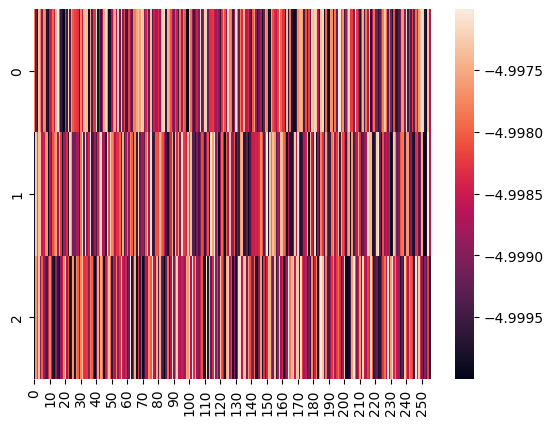

C:\Users\jbkra\anaconda3\envs\kepler\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning:

Using a target size (torch.Size([1000, 3])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



linear1.weight tensor([[-2.0949e-04, -1.0737e-09,  8.1532e-08,  ..., -2.5771e-03,
         -8.9715e-06, -6.3768e-07],
        [ 4.8356e-03, -1.2485e-07, -6.8058e-08,  ...,  1.6236e-02,
          1.8063e-05,  1.0080e-05],
        [ 1.3339e-03, -6.6787e-08,  5.7059e-08,  ...,  5.2121e-03,
          1.7218e-05,  5.9414e-06],
        ...,
        [-7.0935e-03,  3.5135e-08,  9.5789e-08,  ..., -6.2135e-03,
          1.1874e-05, -3.6918e-05],
        [ 1.0085e-03,  2.7618e-08,  4.6050e-08,  ..., -8.1017e-04,
         -1.1535e-05,  5.8834e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
linear2.weight tensor([[-4.5353e-05,  1.3506e-03,  4.5593e-03,  ..., -2.4893e-04,
         -2.1975e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-2.2788e-03,  1.5708e-03,  5.1676e-03,  ..., -5.9311e-04,
         -2.7083e-03,  0.0000e+00],
        ...,
        [-1.1864

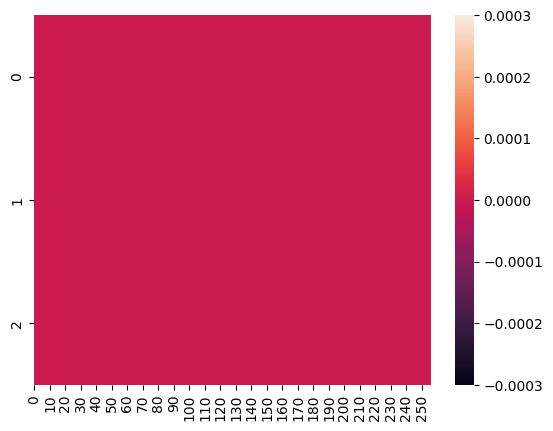

Episode  1  Complete
Timesteps in episode:  1 

First move was: 
[-0.59987044 -0.6        -0.6       ]

 saving best model.... 

Average Critic Loss / Best Average Critic Loss:  30402294.0 / 30402294.0 

Average Actor Loss / Best Average Actor Loss:  179.96031188964844 / 179.96031188964844 

Average Episode Reward / Best Average Episode Reward:  -4988.563067114609 / -4988.563067114609 



C:\Users\jbkra\anaconda3\envs\kepler\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning:

Using a target size (torch.Size([1000, 3])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



linear1.weight tensor([[ 3.5736e-04, -1.6950e-09,  1.7645e-08,  ...,  2.5074e-04,
         -1.2087e-06,  3.3639e-06],
        [ 2.5810e-04,  1.3922e-09,  7.3811e-09,  ...,  2.6016e-03,
         -2.2104e-06,  9.7412e-07],
        [-4.0312e-04, -8.5481e-09,  4.3251e-08,  ..., -2.8352e-03,
         -1.3702e-06, -6.6092e-06],
        ...,
        [ 4.3432e-04,  2.4880e-08, -8.3248e-08,  ...,  4.5590e-04,
          1.1277e-05,  1.4705e-06],
        [ 4.0633e-04,  5.1976e-09, -2.4477e-08,  ...,  1.9939e-04,
          2.9120e-06,  4.7368e-06],
        [-4.5223e-05,  1.7349e-09, -1.3436e-09,  ..., -3.9929e-05,
          3.4268e-07, -6.1011e-07]])
linear2.weight tensor([[ 1.5370e-04,  9.6722e-04,  3.7516e-03,  ...,  3.9607e-05,
          1.2699e-05,  1.2721e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-5.3300e-05,  6.5606e-05,  5.9647e-05,  ..., -1.8560e-04,
         -1.9729e-04, -6.6762e-06],
        ...,
        [-1.3258

linear1.weight tensor([[-3.4086e-03, -6.6144e-08,  5.6765e-08,  ..., -7.8836e-04,
          5.8264e-06, -8.8414e-06],
        [ 1.8834e-03,  6.7686e-08,  3.3404e-08,  ..., -1.5749e-03,
         -4.6942e-06,  2.3845e-06],
        [-6.1326e-04, -3.0169e-08,  6.4955e-08,  ...,  6.5437e-04,
         -4.1815e-06, -5.9870e-06],
        ...,
        [-2.3484e-03, -2.8000e-08,  3.0305e-08,  ..., -1.5224e-03,
          1.2176e-07, -7.9344e-06],
        [-9.3649e-03, -1.4917e-07,  1.3022e-07,  ..., -1.3148e-03,
          1.6779e-05, -3.3351e-05],
        [ 9.8742e-04,  1.8528e-08,  7.5670e-09,  ..., -1.5211e-03,
          2.1951e-06,  2.4024e-06]])
linear2.weight tensor([[-1.0757e-03, -2.1754e-03, -1.1191e-03,  ..., -9.4154e-04,
         -4.6721e-04,  2.5639e-09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 2.3028e-03,  1.3447e-03, -8.1250e-05,  ..., -8.3489e-04,
          6.8242e-04,  1.8285e-04],
        ...,
        [ 8.8749

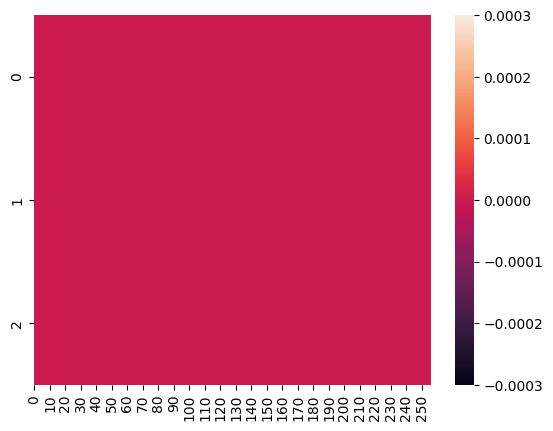

Episode  2  Complete
Timesteps in episode:  2 

First move was: 
[ 0.6 -0.6 -0.6]

 saving best model.... 

Average Critic Loss / Best Average Critic Loss:  13064619.6796875 / 13064619.6796875 

Average Actor Loss / Best Average Actor Loss:  704.1679382324219 / 179.96031188964844 

Average Episode Reward / Best Average Episode Reward:  -2646.899807586836 / -2646.899807586836 



C:\Users\jbkra\anaconda3\envs\kepler\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning:

Using a target size (torch.Size([1000, 3])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



linear1.weight tensor([[-1.3459e-03, -2.2502e-08, -2.4216e-08,  ..., -4.3565e-04,
          1.1003e-05, -1.6484e-05],
        [ 6.7145e-04,  1.1248e-09, -1.5466e-08,  ..., -2.1257e-03,
         -1.6673e-05, -6.4670e-06],
        [ 1.4157e-03, -5.4410e-09, -1.1917e-08,  ...,  3.8066e-03,
          5.9615e-06,  4.3338e-06],
        ...,
        [ 6.4544e-05, -3.6647e-09, -1.1179e-08,  ..., -8.6397e-05,
          1.5650e-06,  2.2533e-06],
        [-8.1448e-04, -2.5399e-09,  4.8979e-09,  ...,  6.3834e-04,
          7.2919e-06, -3.4343e-06],
        [ 3.8495e-04,  2.0595e-09, -1.0660e-09,  ..., -2.9901e-04,
         -3.6024e-06,  1.8564e-06]])
linear2.weight tensor([[ 2.3268e-04,  7.6139e-04, -3.4494e-04,  ..., -2.1765e-04,
          1.7875e-06,  1.8886e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.6050e-03,  1.4001e-03,  1.1540e-03,  ...,  8.8507e-05,
          1.5873e-04,  5.0519e-04],
        ...,
        [ 6.4542

linear1.weight tensor([[ 3.4622e-04, -1.2678e-08,  1.0002e-07,  ...,  3.0986e-06,
          1.0348e-05,  6.9129e-06],
        [-1.1210e-03,  2.8448e-09, -3.7420e-08,  ..., -2.3820e-03,
         -8.7133e-06, -4.9962e-06],
        [ 2.2660e-03, -1.5220e-08,  2.8074e-08,  ...,  5.6657e-03,
          2.0344e-05,  4.5914e-06],
        ...,
        [-1.1620e-03, -3.0702e-09, -5.0464e-09,  ..., -3.5310e-03,
         -7.6757e-06, -3.9309e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.0034e-04, -2.4240e-09, -1.5413e-09,  ...,  1.4862e-04,
          9.2033e-07, -4.6175e-07]])
linear2.weight tensor([[ 1.9359e-04,  1.4460e-04, -1.3097e-03,  ..., -3.1188e-04,
          0.0000e+00,  6.5491e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.6088e-04,  3.4186e-04,  8.5473e-04,  ...,  1.4304e-04,
          0.0000e+00,  2.4311e-04],
        ...,
        [ 1.4769

linear1.weight tensor([[ 9.2597e-04, -4.3939e-09,  8.0822e-09,  ...,  5.7357e-04,
          6.7353e-06,  2.1363e-06],
        [-5.6033e-04, -4.4273e-08,  9.9425e-09,  ..., -2.6774e-03,
         -1.6070e-06, -6.0642e-06],
        [-6.5820e-06,  2.7680e-08, -1.0517e-08,  ...,  2.1238e-03,
          1.5506e-07,  2.7526e-06],
        ...,
        [-1.2246e-03, -2.2366e-08, -2.3696e-09,  ..., -3.0994e-03,
         -1.0458e-05, -4.5689e-06],
        [ 2.7585e-08,  1.8404e-12, -1.5840e-12,  ...,  9.9098e-09,
          3.8229e-10,  5.9301e-10],
        [ 4.8241e-04, -1.4614e-09,  5.3375e-09,  ...,  2.6635e-04,
          3.6914e-06,  8.5152e-07]])
linear2.weight tensor([[-1.7411e-04, -4.7777e-04, -1.3758e-03,  ..., -5.7880e-05,
          1.2156e-09,  7.8598e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.0949e-03, -1.2516e-03, -3.2285e-04,  ...,  4.0337e-05,
          6.6574e-09, -1.6829e-04],
        ...,
        [-5.5537

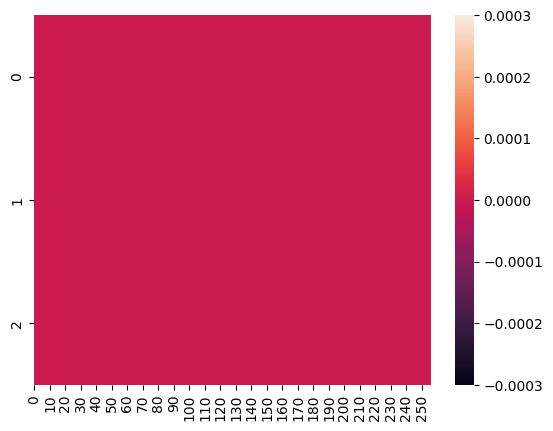

Episode  3  Complete
Timesteps in episode:  3 

First move was: 
[ 0.6 -0.6 -0.6]

 saving best model.... 

Average Critic Loss / Best Average Critic Loss:  9743837.9296875 / 9743837.9296875 

Average Actor Loss / Best Average Actor Loss:  1822.3663330078125 / 179.96031188964844 

Average Episode Reward / Best Average Episode Reward:  -2064.707852295605 / -2064.707852295605 



C:\Users\jbkra\anaconda3\envs\kepler\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning:

Using a target size (torch.Size([1000, 3])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



linear1.weight tensor([[-4.6411e-05, -4.2432e-10, -3.6097e-10,  ..., -2.0169e-05,
         -3.3930e-07, -6.0718e-07],
        [-1.0942e-03,  6.5308e-09, -6.1520e-09,  ..., -2.6481e-03,
          4.2154e-06, -6.2477e-06],
        [ 1.1043e-03,  1.3792e-09,  1.4829e-09,  ...,  2.6384e-03,
         -3.7541e-06,  5.3752e-06],
        ...,
        [ 6.4941e-06,  2.2075e-10, -6.5925e-11,  ...,  4.6088e-06,
         -9.6866e-08,  9.6762e-08],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.5049e-04,  5.8716e-10, -1.0094e-09,  ..., -3.7025e-04,
          4.4576e-07, -8.9566e-07]])
linear2.weight tensor([[ 7.9564e-06, -5.4808e-04, -9.3095e-04,  ...,  7.3367e-08,
          0.0000e+00, -1.2046e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 6.9395e-05,  8.0445e-05,  2.5148e-05,  ...,  6.4805e-07,
          0.0000e+00, -4.4465e-06],
        ...,
        [ 3.3297

linear1.weight tensor([[ 3.2737e-08, -4.5487e-15,  1.9193e-14,  ...,  2.2639e-08,
          1.2147e-10,  3.6263e-11],
        [-4.4346e-05,  6.2349e-10,  2.7854e-11,  ..., -1.0675e-04,
         -2.3502e-07, -1.2047e-07],
        [-1.4502e-04,  1.9768e-09, -1.2968e-11,  ..., -3.5055e-04,
         -8.2047e-07, -3.8519e-07],
        ...,
        [ 2.1431e-04, -2.9098e-09, -5.1856e-11,  ...,  5.1628e-04,
          1.1702e-06,  5.8555e-07],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.5267e-08, -3.2541e-14,  6.5081e-14,  ...,  1.0939e-08,
          5.1917e-11,  1.0228e-11]])
linear2.weight tensor([[-3.5711e-08,  7.3965e-07,  9.8535e-06,  ...,  3.4726e-06,
          0.0000e+00, -1.1782e-08],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-5.6899e-07,  9.4716e-07,  5.4176e-06,  ...,  2.4417e-06,
          0.0000e+00, -1.8773e-07],
        ...,
        [-2.5639

linear1.weight tensor([[ 5.6478e-05,  8.3437e-10, -2.5908e-09,  ...,  3.4116e-05,
          3.5242e-07,  8.3274e-07],
        [ 8.3279e-04,  5.8658e-09, -7.0821e-09,  ...,  1.7071e-03,
          4.1782e-06,  2.8858e-06],
        [ 2.6244e-03,  1.4888e-08, -4.8544e-09,  ...,  6.0553e-03,
          1.2599e-05,  3.8299e-06],
        ...,
        [-3.8584e-03, -2.2495e-08,  1.0069e-08,  ..., -8.7891e-03,
         -1.8619e-05, -6.5159e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 7.2405e-05,  1.0686e-09, -3.3224e-09,  ...,  4.3734e-05,
          4.5154e-07,  1.0669e-06]])
linear2.weight tensor([[-2.9523e-06, -9.4348e-06, -5.3965e-05,  ..., -1.7753e-05,
          0.0000e+00, -4.8761e-07],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.4898e-04, -1.7622e-04, -7.0358e-05,  ..., -3.0823e-08,
          0.0000e+00, -2.4606e-05],
        ...,
        [-6.3696

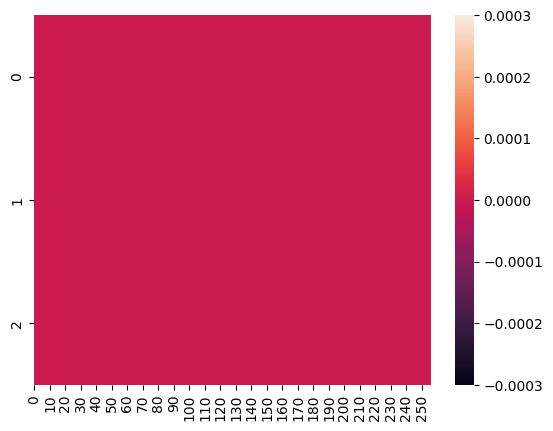

Episode  4  Complete
Timesteps in episode:  3 

First move was: 
[ 0.6 -0.6 -0.6]

 saving best model.... 

Average Critic Loss / Best Average Critic Loss:  8371103.197916667 / 8371103.197916667 

Average Actor Loss / Best Average Actor Loss:  2668.5881958007812 / 179.96031188964844 

Average Episode Reward / Best Average Episode Reward:  -2228.8686781741526 / -2064.707852295605 



C:\Users\jbkra\anaconda3\envs\kepler\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning:

Using a target size (torch.Size([1000, 3])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



linear1.weight tensor([[-2.3888e-06,  2.3171e-11, -3.5359e-11,  ..., -1.7709e-06,
         -5.5268e-09, -1.4940e-09],
        [-1.5240e-03,  3.6298e-08,  4.2151e-09,  ..., -2.9942e-03,
         -8.9494e-06, -2.9300e-06],
        [-2.7281e-03,  6.4926e-08,  7.7313e-09,  ..., -5.3582e-03,
         -1.6010e-05, -5.2361e-06],
        ...,
        [ 5.2634e-03, -1.1991e-07, -2.2319e-08,  ...,  1.0067e-02,
          2.8956e-05,  9.9828e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
linear2.weight tensor([[ 1.1097e-08,  9.0679e-06,  4.3601e-05,  ...,  1.2798e-05,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 6.9287e-07,  5.6616e-04,  2.7223e-03,  ...,  7.9904e-04,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 2.8927

linear1.weight tensor([[-1.2704e-06,  2.6241e-11,  3.0220e-11,  ..., -8.3220e-07,
         -4.4677e-09, -1.0009e-08],
        [-2.6746e-04,  1.0231e-08,  2.6895e-08,  ..., -2.2596e-04,
         -6.3365e-06, -4.0284e-07],
        [-6.3337e-04,  1.5751e-08,  3.6651e-08,  ..., -1.8998e-03,
         -2.2940e-06, -4.8231e-06],
        ...,
        [ 9.5354e-04, -2.5767e-08, -6.1789e-08,  ...,  2.5289e-03,
          6.5464e-06,  6.3201e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
linear2.weight tensor([[ 3.5216e-08, -1.5202e-06, -8.4487e-06,  ..., -1.5826e-06,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-3.4556e-06,  1.4917e-04,  1.7074e-04,  ...,  6.5177e-05,
          0.0000e+00,  0.0000e+00],
        ...,
        [-1.3873

linear1.weight tensor([[ 3.5295e-03, -5.1239e-08,  8.7648e-08,  ...,  2.1935e-03,
         -2.4983e-06,  2.0476e-05],
        [-1.9687e-03,  2.2461e-08, -3.4333e-08,  ..., -2.5760e-03,
          4.4336e-07, -1.0645e-05],
        [-5.7998e-03,  7.4848e-08, -2.9750e-08,  ..., -1.4475e-02,
          5.4394e-08, -2.9732e-05],
        ...,
        [ 7.7209e-03, -1.0960e-07,  5.2469e-08,  ...,  1.8160e-02,
         -4.5143e-07,  4.0177e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 5.9381e-07,  2.6118e-13, -6.0686e-13,  ...,  6.8127e-07,
         -2.6634e-09,  2.2736e-09]])
linear2.weight tensor([[-2.4381e-05, -7.8381e-05, -2.5262e-04,  ..., -4.2440e-05,
          0.0000e+00,  2.5711e-07],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 6.1342e-04,  1.6729e-03,  1.0577e-03,  ...,  6.1859e-05,
          0.0000e+00, -6.4688e-06],
        ...,
        [ 2.4047

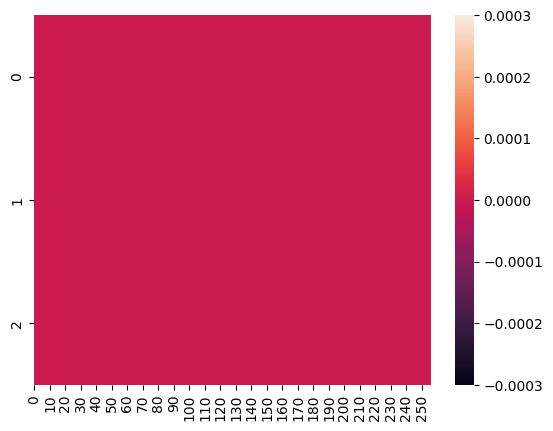

Episode  5  Complete
Timesteps in episode:  3 

First move was: 
[ 0.6 -0.6 -0.6]

 saving best model.... 

Average Critic Loss / Best Average Critic Loss:  7678640.885416667 / 7678640.885416667 

Average Actor Loss / Best Average Actor Loss:  3530.75927734375 / 179.96031188964844 

Average Episode Reward / Best Average Episode Reward:  -2228.0783993548553 / -2064.707852295605 



C:\Users\jbkra\anaconda3\envs\kepler\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning:

Using a target size (torch.Size([1000, 3])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



linear1.weight tensor([[-1.3830e-03, -1.7995e-08, -4.3306e-09,  ..., -6.9849e-04,
         -7.0541e-06, -2.7978e-06],
        [ 1.8654e-03, -4.1265e-08, -3.7928e-08,  ...,  1.6418e-03,
          1.2701e-05,  1.1889e-05],
        [ 2.6148e-03, -7.4443e-08, -5.8357e-08,  ...,  2.4577e-03,
          1.9401e-05,  1.6177e-05],
        ...,
        [-3.3238e-03,  1.5757e-07,  1.1149e-07,  ..., -3.7932e-03,
         -2.7818e-05, -2.7780e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 3.1539e-05, -1.0097e-09, -9.0444e-11,  ...,  2.5562e-05,
         -1.4686e-08,  3.4387e-07]])
linear2.weight tensor([[ 6.7885e-05,  1.4557e-04,  1.4873e-04,  ...,  4.9209e-05,
          0.0000e+00,  2.0959e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-6.9270e-04, -9.9055e-04, -4.5598e-04,  ..., -7.4344e-06,
          0.0000e+00, -2.1387e-04],
        ...,
        [-2.5933

linear1.weight tensor([[ 3.0919e-04, -1.5540e-11,  3.6347e-11,  ...,  3.4220e-04,
         -2.4341e-06,  2.0109e-06],
        [-9.4454e-04, -2.0703e-09, -1.6999e-09,  ..., -9.8111e-04,
          8.1327e-06, -6.7761e-06],
        [-8.6118e-05,  4.3751e-11, -8.3310e-09,  ...,  1.0438e-04,
          1.6304e-06, -6.2351e-07],
        ...,
        [-5.2414e-05, -7.8918e-09,  2.0558e-08,  ..., -3.4177e-04,
         -8.2306e-08, -1.6911e-06],
        [ 2.8801e-08, -1.1450e-12,  1.7647e-12,  ...,  1.3383e-08,
          3.1716e-10,  3.4481e-10],
        [-2.6843e-05,  1.6891e-12, -1.6493e-12,  ..., -2.9769e-05,
          2.1408e-07, -1.7480e-07]])
linear2.weight tensor([[-2.8449e-04, -2.9468e-04, -1.1432e-04,  ...,  4.4123e-06,
         -1.2743e-10, -2.3831e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 2.0397e-03,  2.1517e-03,  9.8031e-04,  ...,  3.5024e-05,
          9.1363e-10,  1.7086e-03],
        ...,
        [ 7.6957

linear1.weight tensor([[ 1.1775e-05,  6.0615e-11,  1.4719e-10,  ...,  5.5722e-06,
          7.6213e-08,  1.6300e-07],
        [ 1.6930e-03,  4.0188e-08,  1.8257e-08,  ...,  2.1031e-03,
          3.5747e-06,  6.6044e-06],
        [ 1.3309e-03,  4.0333e-08,  2.9453e-08,  ...,  6.2097e-04,
         -3.4136e-06, -3.0338e-06],
        ...,
        [-3.2743e-03, -8.5718e-08, -5.3103e-08,  ..., -2.5798e-03,
          1.4413e-06,  5.2168e-07],
        [ 1.0167e-05,  4.3825e-11,  1.2565e-10,  ...,  4.7743e-06,
          7.0001e-08,  1.4361e-07],
        [ 1.9797e-07, -3.7001e-12,  5.5534e-12,  ...,  8.1899e-08,
          2.7175e-09,  3.1114e-09]])
linear2.weight tensor([[-1.1380e-07,  1.0363e-04,  1.4789e-04,  ...,  1.0816e-04,
         -1.1723e-07,  6.3839e-08],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 6.2938e-07, -5.9013e-05, -5.7458e-05,  ..., -3.7741e-05,
          6.4835e-07, -3.5307e-07],
        ...,
        [-3.8273

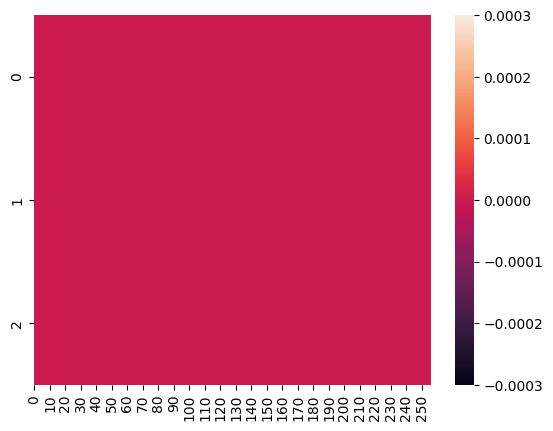

SystemError: CPUDispatcher(<function coe2rv_many at 0x0000029D185EC700>) returned a result with an error set

In [328]:
# Train agent
average_critic_episode_losses, average_actor_episode_losses, average_episode_rewards, all_action_trajectories, first_actions = policy.train(replay_buffer, episodes, policy_noise, noise_clip, \
                                                                                          batch_size, noise_decay_rate, tau = tau, discount = discount)

In [ ]:
replay_buffer.sample(10)
[-4.9978, -4.9993, -4.9996, -4.9974, -4.9978, -4.9990, -4.9977, -4.9978,
         -4.9997, -4.9998, -4.9985, -4.9984, -4.9980, -4.9985, -4.9973, -4.9970,
         -4.9982, -4.9995, -4.9998, -5.0000, -4.9983, -4.9995, -4.9972, -4.9994,

## Results

199


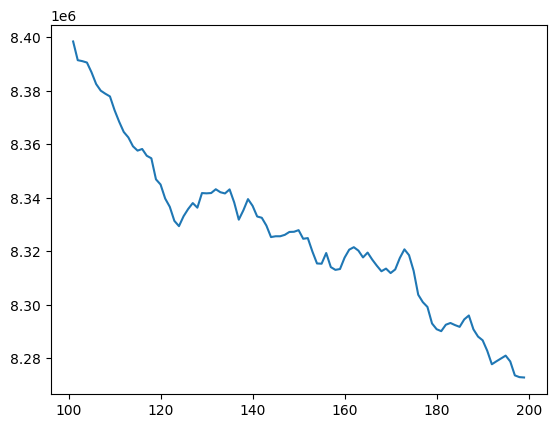

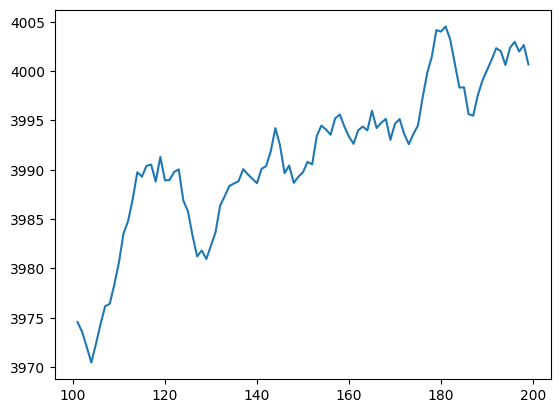

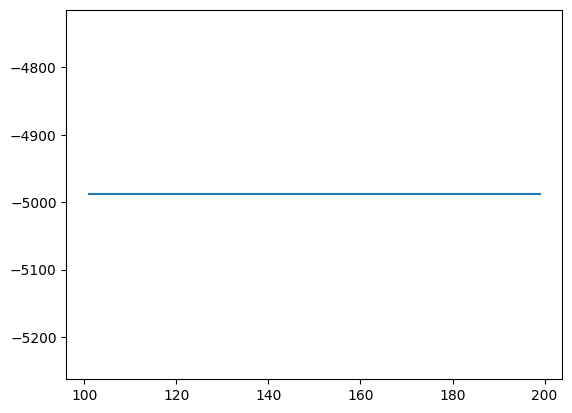

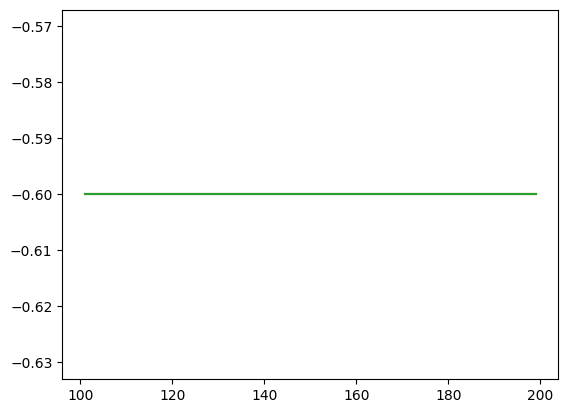

In [184]:

a1 = []
a2 = []
a3 = []
for action in first_actions:
    a1.append(action[0])
    a2.append(action[1])
    a3.append(action[2])
    
smooth_factor = 50
smoothed_average_critic_episode_losses = moving_average(average_critic_episode_losses, smooth_factor)
smoothed_average_actor_episode_losses = moving_average(average_actor_episode_losses, smooth_factor)
smoothed_average_episode_rewards = moving_average(average_episode_rewards, smooth_factor)

episode_num = len(average_critic_episode_losses)
print(episode_num)
episode_list = np.linspace(1,episode_num, episode_num)
start = 100
end = episode_num

plt.plot(episode_list[start:end], smoothed_average_critic_episode_losses[start:end])
plt.show()

plt.plot(episode_list[start:end], smoothed_average_actor_episode_losses[start:end])
plt.show()

plt.plot(episode_list[start:end], smoothed_average_episode_rewards[start:end])
plt.show()

plt.plot(episode_list[start:end], a1[start:end])
plt.plot(episode_list[start:end], a2[start:end])
plt.plot(episode_list[start:end], a3[start:end])
plt.show()

# Exploit

In [ ]:
policy.load("best_episode_loss_model","saves")

In [ ]:
env = EarthMoonSystem()
obs, _ = env.reset()

for n in range(0, 10):
# Take a random action
    done = False
   #take a noisy action
    action = policy.select_action(np.array(obs), noise=0)
    


    state, reward, term, trunc, op = env.step(action)
    
    if term or trunc:
        done =True
        

    print("Maneuver: ", n)
    print(action)
    print("reward: ", reward)
    print(term)
    print(trunc)
    env.render()
    if done == True:
        break





In [ ]:
env = EarthMoonSystem()
obs, _ = env.reset()

for n in range(0,10):
    _, _ = env.reset()
# Take a random action
    done = False
   #take a noisy action
    obs = replay_buffer.sample(1)[0][0]
    
    action = policy.select_action(np.array(obs), noise=0)
    

    state, reward, term, trunc, op = env.step(action)
    
    
    
    if term or trunc:
        done =True
        


    print(action)
    print("reward: ", reward)

    env.render()
    if done == True:
        break




In [ ]:
replay_buffer.sample(1)[0][2]

In [ ]:
replay_buffer.sample(1)

# Evaluate

## Saliency Map

In [ ]:
env = EarthMoonSystem()

obs, _ = env.reset()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SEED = 1

torch.manual_seed(SEED)
np.random.seed(SEED)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 

#Get maximum and minimum actions
max_action = env.action_space.high
min_action = env.action_space.low

# policy = TD3(state_dim, action_dim, max_action, min_action, env)


# policy.load("best_episode_loss_model","saves")



# policy.actor.layer_norm1.eval()
# policy.actor.layer_norm2.eval()

saliency = Saliency(policy.actor)


# Define your input state (replace with your own state)
input_state = torch.tensor(obs)

input_states = replay_buffer.get_all()
for n in range(0, len(input_states)):
    input_state = input_states[n]
    input_state = input_state.to(torch.float)
    action = policy.actor(input_state)
    
    # Compute the saliency map
    saliency_map = saliency.attribute(input_state)
    print("\n")
    print(input_state)
    print(action)
    print(saliency_map)
    print("\n")

## Layer-wise Relevance Propagation

In [ ]:




model = policy.actor



# Compute the attributions
# Define your input state (replace with your own state)
input_state = torch.tensor(obs)

input_tensor = input_state.to(torch.float)
baseline_tensor = torch.zeros(7)

print(input_tensor.shape)
print(baseline_tensor.shape)
lig = LayerIntegratedGradients(model, model.fc1)

attributions = lig.attribute(input_tensor, baseline_tensor)


## Computational Graph Visualization

In [221]:
from captum.attr import LayerIntegratedGradients
from captum.attr import Saliency
from torchviz import make_dot

env = EarthMoonSystem()

obs, _ = env.reset()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SEED = 1

torch.manual_seed(SEED)
np.random.seed(SEED)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 

#Get maximum and minimum actions
max_action = env.action_space.high
min_action = env.action_space.low

policy = TD3(state_dim, action_dim, max_action, min_action, env)


policy.load("best_episode_loss_model","saves")


model = policy.actor
print(obs)
x = torch.tensor(obs, dtype=torch.double)

print(x)
print(type(x))
# for name, param in model.named_parameters():
#     if param.dtype == torch.float32:
#         param.data = param.double().data
#     print(name, param.dtype)
y = model(x)
o_image = make_dot(y, params=dict(model.named_parameters())).render("model", format="png")
from IPython.display import Image
Image(filename='model.png')

ModuleNotFoundError: No module named 'captum'